# –ó–∞–¥–∞–Ω–∏–µ 2: –¢—Ä–µ—Ö–∫–ª–∞—Å—Å–æ–≤–∞—è —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏—è

–ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∂–∏–≤–æ—Ç–Ω—ã—Ö —Å —Ç—Ä–µ–º—è –∫–ª–∞—Å—Å–∞–º–∏: –∫–ª–∞—Å—Å "—Ñ–æ–Ω" (–º–µ—Ç–∫–∞ 0), –∫–ª–∞—Å—Å "–∫–æ—à–∫–∞" (–º–µ—Ç–∫–∞ 1) –∏ –∫–ª–∞—Å—Å "—Å–æ–±–∞–∫–∞" (–º–µ—Ç–∫–∞ 2).
![Image](https://miro.medium.com/max/1130/1*DDEkOFC93pEbrTdyhdpXZg.png)

–î–ª—è —ç—Ç–æ–≥–æ —Å–∞–º–∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º [–¥–∞—Ç–∞—Å–µ—Ç](https://drive.google.com/uc?export=download&id=1ZsRAXiPgOU5Am8tNZ7mruwtJh3ck8TI5), —Ä–µ–∞–ª–∏–∑—É–µ–º –º–µ—Ç—Ä–∏–∫–∏/—Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, —Ä–µ–∞–ª–∏–∑—É–µ–º –∏ –æ–±—É—á–∏–º —Å–≤–æ—é [PSPNet](https://arxiv.org/abs/1612.01105)-–ø–æ–¥–æ–±–Ω—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É.

In [6]:
# —Å–∫–∞—á–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ
!gdown -q --id 1ZsRAXiPgOU5Am8tNZ7mruwtJh3ck8TI5 -O data.zip
!unzip -qq data.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1ZsRAXiPgOU5Am8tNZ7mruwtJh3ck8TI5

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


### –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥—É–ª–µ–π

In [1]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º pytorch –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –Ω–µ–π—Ä–æ–Ω–Ω—ã–º–∏ —Å–µ—Ç—è–º–∏
import torch
import torch.nn as nn
import torch.nn.functional as F

# –î–ª—è —Ä–∞–±–æ—Ç—ã —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏/–≥—Ä–∞—Ñ–∏–∫–∞–º–∏
from torchvision import transforms
# –ó–∞–≥—Ä—É–∂–∞–µ–º —Å–ø–æ—Å–æ–±—ã –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
from torchvision.transforms.functional import InterpolationMode as IM
import matplotlib.pyplot as plt

# –î–ª—è –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –∏ —Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ç–µ—Ä—å –≤ —Ö–æ–¥–µ –æ–±—É—á–µ–Ω–∏—è
from torch.utils.tensorboard import SummaryWriter

# –î–ª—è —É–¥–æ–±–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Å –æ–±—É—á–∞—é—â–µ–π/—Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–æ–π
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# –ü—Ä–æ—á–µ–µ
import numpy as np
from tqdm.notebook import tqdm

## –ß–∞—Å—Ç—å 1: –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

### 1.1 –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞ (1 –±–∞–ª–ª)

–î–ª—è –Ω–∞—á–∞–ª–∞ —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏ —Ç—Ä–µ–±—É–µ—Ç—Å—è –≤—ã–ø–æ–ª–Ω–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –ø—É–Ω–∫—Ç—ã:
- **–û–ø—Ä–µ–¥–µ–ª–∏—Ç—å—Å—è —Å–æ —Å–ø–æ—Å–æ–±–æ–º —Ö—Ä–∞–Ω–µ–Ω–∏—è/—á—Ç–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –¥–∏—Å–∫–∞. –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Å—Ä–∞–≤–Ω–∏—Ç—å —Ç—Ä–∏ –≤–∞—Ä–∏–∞–Ω—Ç–∞: `HDF5`, `memory-mapped files` –∏ `"—Å—ã—Ä–æ–π"` –≤–∏–¥ ( —Ö—Ä–∞–Ω–µ–Ω–∏–µ `.jpg/.png` —Ñ–∞–π–ª–æ–≤ –Ω–∞ –¥–∏—Å–∫–µ). –í—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∫–ª–∞—Å—Å—ã —É–∂–µ –æ–ø–∏—Å–∞–Ω—ã –≤ —Ñ–∞–π–ª–µ `utils.py`. –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –ª–∏—à—å –∑–∞–º–µ—Ä–∏—Ç—å —Å–∫–æ—Ä–æ—Å—Ç—å —á—Ç–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —Ñ–æ—Ä–º–∞—Ç–æ–≤, –∑–∞—Ç–µ–º –≤—ã–±—Ä–∞—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –±—ã—Å—Ç—Ä—ã–π.**
    - –ü–æ–≥–æ–≤–æ—Ä–∏–º –ø–æ–ø–æ–¥—Ä–æ–±–Ω–µ–µ –æ–± –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è—Ö —ç—Ç–∏—Ö —Ñ–æ—Ä–º–∞—Ç–æ–≤ —Ö—Ä–∞–Ω–µ–Ω–∏—è. –í –∑–∞–¥–∞—á–∞—Ö –∫–æ–º—å—é—Ç–µ—Ä–Ω–æ–≥–æ –∑—Ä–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç—ã, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –∏–º–µ—é—Ç –±–æ–ª—å—à–æ–π —Ä–∞–∑–º–µ—Ä, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –ø–æ–º–µ—â–∞–µ—Ç—Å—è –≤ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –ø–∞–º—è—Ç—å.  –§–æ—Ä–º–∞—Ç `hdf5` –ø–æ–∑–≤–æ–ª—è–µ—Ç —Ä–∞–∑–±–∏–≤–∞—Ç—å –º–∞—Å—Å–∏–≤—ã –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –Ω–∞ [chunks](https://www.oreilly.com/library/view/python-and-hdf5/9781491944981/ch04.html), –∫–æ—Ç–æ—Ä—ã–µ –æ—Ä–≥–∞–Ω–∏–∑–æ–≤–∞–Ω—ã –≤ –≤–∏–¥–µ [B-–¥–µ—Ä–µ–≤—å–µ–≤](https://en.wikipedia.org/wiki/B-tree). –¢–∞–∫–æ–π –≤–∏–¥ —Ö—Ä–∞–Ω–µ–Ω–∏—è –Ω–µ–æ–±—Ö–æ–¥–∏–º –¥–ª—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–≥–æ —á—Ç–µ–Ω–∏—è `hyperslabs` - –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã—Ö —Å—Ä–µ–∑–æ–≤ –º–∞—Å—Å–∏–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ—Å–º–µ–∂–Ω—ã –≤ –ø–∞–º—è—Ç–∏ (non-contiguous). –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é, `hdf5` —Ö—Ä–∞–Ω–∏—Ç –¥–∞–Ω–Ω—ã–µ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ (contiguous)
    - `Memory-mapping` —Ñ–∞–π–ª–æ–≤ –≤ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –ø–∞–º—è—Ç—å –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å —ç—Ç–∞–ø –±—É—Ñ—Ñ–µ—Ä–∏–∑–∞—Ü–∏–∏, —Ç–µ–º —Å–∞–º—ã–º –ø—Ä–æ–ø—É—Å–∫–∞—è –æ–ø–µ—Ä–∞—Ü–∏—é –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è, –ª–µ–Ω–∏–≤–æ –∑–∞–≥—Ä—É–∂–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –Ω–∞–ø—Ä—è–º—É—é. –û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å —ç—Ç–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ –≤ —Ç–æ–º, —á—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∏—á–µ—Å–∫–∏ `Best case` —Å–∫–æ—Ä–æ—Å—Ç–∏ —á—Ç–µ–Ω–∏—è –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –Ω–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–º –±–ª–æ–∫–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ (contiguous), –∞ `Worst case` - –Ω–∞–æ–±–æ—Ä–æ—Ç, –Ω–∞ –Ω–µ—Å–º–µ–∂–Ω–æ–º –≤ –ø–∞–º—è—Ç–∏ (non-contiguous) –±–ª–æ–∫–µ (–Ω–∞ –ø–æ—Ä—è–¥–∫–∏ —Ö—É–∂–µ, —á–µ–º –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ –≤ `hdf5`).

- **–ü—Ä–∏–≤–µ—Å—Ç–∏ –≤—Å–µ –ø–∞—Ä—ã (–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, –º–∞—Å–∫–∞) –∫ –µ–¥–∏–Ω–æ–º—É —Ä–∞–∑–º–µ—Ä—É `target_shape`, —É–∫–∞–∑–∞–Ω–Ω–æ–º—É –¥–∞–ª–µ–µ –≤ —Å–ª–æ–≤–∞—Ä–µ –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–∏ `default_config`**. –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∞—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –¥–µ–π—Å—Ç–≤–∏–π:
    1. **–ü—Ä–∏ –ø–æ–º–æ—â–∏ [transforms.Resize](https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html#torchvision.transforms.Resize) –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞—Ç—å (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –±–∏–ª–∏–Ω–µ–π–Ω–∞—è –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—è) –∑–Ω–∞—á–µ–Ω–∏—è –ø–∏–∫—Å–µ–ª–µ–π –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ —Ä–∞–∑–º–µ—Ä–∞ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–æ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ**. –û–¥–Ω–∞–∫–æ, –ø–æ–¥–æ–±–Ω–∞—è –æ–ø–µ—Ä–∞—Ü–∏—è –∏—Å–∫–∞–∂–∞–µ—Ç –∏—Å—Ö–æ–¥–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å—Ç–æ—Ä–æ–Ω –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, —á—Ç–æ –º–æ–∂–µ—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ —Å–∫–∞–∑–∞—Ç—å—Å—è –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ —Å–µ—Ç–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –æ–±—â–∏–π –≤–∏–¥ –º–æ—Ä–¥—ã –∫–æ—à–∫–∏ –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è, –∞ –Ω–µ –æ—Ç —Å—É—â–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–∞ "–∫–æ—à–∫–∞": –æ–Ω–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ —Ä–∞—Å—Ç—è–Ω—É—Ç–æ, –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∞—Å—Ç—è–Ω—É—Ç–æ –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω–æ/–≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–æ. –ù–µ–∫–æ–Ω—Å–∏—Å—Ç–µ–Ω—Ç–Ω–æ—Å—Ç—å –≤ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ –æ–¥–Ω–æ–π –∏ —Ç–æ–π –∂–µ —Å—É—â–Ω–æ—Å—Ç–∏ –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ–º—É –æ–±—É—á–µ–Ω–∏—é, —Ç–∞–∫ –∫–∞–∫ —Ä–∞–∑–º–µ—Ä—ã —è–¥—Ä–∞ —Å–≤–µ—Ä—Ç–∫–∏ –µ–¥–∏–Ω—ã –¥–ª—è –ª—é–±–æ–≥–æ –≤—Ö–æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è! –ö —Å—á–∞—Å—Ç—å—é, —ç—Ç–∞ –ø—Ä–æ–±–ª–µ–º–∞ —É–∂–µ —Ä–µ—à–µ–Ω–∞ –≤ `transforms.Resize`: –ø—Ä–∏ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–º –∞—Ä–≥—É–º–µ–Ω—Ç–µ `size` –Ω–∞–∏–º–µ–Ω—å—à–∞—è —Å—Ç–æ—Ä–æ–Ω–∞ –≤—Ö–æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –±—É–¥–µ—Ç –∏–Ω—Ç–µ—Ä–ø–æ–ª–∏—Ä–æ–≤–∞–Ω–∞ –¥–æ `size`, –∞ –¥—Ä—É–≥–∞—è —Å—Ç–æ—Ä–æ–Ω–∞ (–Ω–∞–∏–±–æ–ª—å—à–∞—è) –¥–æ —Ä–∞–∑–º–µ—Ä–∞ `size * aspect_ratio`, —Ç.–µ —Å–æ—Ö—Ä–∞–Ω—è—è —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Å—Ç–æ—Ä–æ–Ω `aspect_ratio`
    2. –ù–∞ —Ç–µ–∫—É—â–∏–π –º–æ–º–µ–Ω—Ç –ª–∏—à—å –æ–¥–Ω–∞ –∏–∑ —Å—Ç–æ—Ä–æ–Ω –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ç—Ä–µ–±—É–µ–º–æ–º—É —Ä–∞–∑–º–µ—Ä—É `target_shape`. –í–æ–∑–º–æ–∂–µ–Ω —Å–ª—É—á–∞–π –∫–æ–≥–¥–∞ –æ—Å—Ç–∞–≤—à–∞—è—Å—è —Å—Ç–æ—Ä–æ–Ω–∞ –±–æ–ª—å—à–µ —Ç—Ä–µ–±—É–µ–º–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞. –¢–æ–≥–¥–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ **–æ–±—Ä–µ–∑–∞—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –ø—Ä–∏ –ø–æ–º–æ—â–∏ [transforms.CenterCrop](https://pytorch.org/vision/stable/generated/torchvision.transforms.CenterCrop.html#torchvision.transforms.CenterCrop)**.

> –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–π –º–æ–¥—É–ª—è `transforms` –º–æ–∂–Ω–æ –≤—ã–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–∏ –ø–æ–º–æ—â–∏ [transforms.Compose](https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html).
- **–û—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–æ–ø—Ä–æ—Å:** `–ê –∑–∞—á–µ–º, –≤–æ–æ–±—â–µ, —Ç—Ä–µ–±—É–µ—Ç—Å—è —Å–≤–æ–¥–∏—Ç—å –≤—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫ –æ–¥–Ω–æ–º—É —Ä–∞–∑–º–µ—Ä—É?`

**–í–∞—à –æ—Ç–≤–µ—Ç:** –¢—Ä–µ–±—É–µ—Ç—Å—è —Å–≤–æ–¥–∏—Ç—å –≤—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫ –æ–¥–Ω–æ–º—É —Ä–∞–∑–º–µ—Ä—É, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏ —Ä–∞–±–æ—Ç–∞—é—Ç —Å –æ–¥–Ω–æ—Ä–æ–¥–Ω—ã–º–∏ –≤—Ö–æ–¥–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –¢–∞–∫–∂–µ –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è –æ–±—É—á–µ–Ω–∏—è —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è –ø–∞–∫–µ—Ç—ã (–±–∞—Ç—á–∏). –í—Å–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ –ø–∞–∫–µ—Ç–µ –¥–æ–ª–∂–Ω—ã –∏–º–µ—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä, —á—Ç–æ–±—ã –∏—Ö –º–æ–∂–Ω–æ –±—ã–ª–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ

In [2]:
from utils import *

def resize(img: Image_t, target_shape: tuple[int, int]) -> np.array:
    """
    –ü—Ä–∏–≤–æ–¥–∏—Ç –≤—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (–∏–ª–∏ –º–∞—Å–∫—É) `img` –∫ —Ä–∞–∑–º–µ—Ä—É `target_shape`, —É–∫–∞–∑–∞–Ω–Ω–æ–π –≤—ã—à–µ
    –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é –¥–µ–π—Å—Ç–≤–∏–π. –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ —Ç—Ä–µ–±—É–µ–º—ã–π —Ä–∞–∑–º–µ—Ä `target_shape` "–∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π"
    """
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ –∂–µ–ª–∞–µ–º—ã—Ö —à–∏—Ä–∏–Ω—ã –∏ –≤—ã—Å–æ—Ç—ã –≤ target_shape
    assert target_shape[0] == target_shape[1]

    # –ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º –Ω–∞–∏–º–µ–Ω—å—à—É—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å `img` –ø–æ–¥ `target_shape`
    # –í –∫–∞—á–µ—Å—Ç–≤–µ —Å–ø–æ—Å–æ–±–∞ –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –≤—ã–±–µ—Ä–µ–º –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏—é –º–µ—Ç–æ–¥–æ–º –±–ª–∏–∂–∞–π—à–µ–≥–æ —Å–æ—Å–µ–¥–∞
    # –≠—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –∑–Ω–∞—á–µ–Ω–∏–π –º–∞—Å–∫–∏ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    img = transforms.Resize(size=target_shape, interpolation=IM.NEAREST)(img)  # –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ transforms.Resize
    resize_transform = transforms.Compose([
        # –û–±—Ä–µ–∑–∞–µ–º "–ª–∏—à–Ω–∏–µ" –ø–∏–∫—Å–µ–ª–∏. –ï—Å–ª–∏ –∏—Ö –Ω–µ—Ç, —Ç–æ CenterCrop –Ω–∏—á–µ–≥–æ –Ω–µ –∏–∑–º–µ–Ω–∏—Ç (—Å–ª—É—á–∞–π "–º–µ–Ω—å—à–µ").
        transforms.CenterCrop(size=target_shape),  # –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ transforms.CenterCrop

        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º PIL.Image –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ –º–∞—Å—Å–∏–≤ np.array
        transforms.Lambda(lambda x: np.array(x))  # –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ transforms.Lambda
    ])

    return resize_transform(img)

In [3]:
def prepare_dataset(config: dict, storage_class: Type[storage_class]):
    """
    –ü—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –¥–∞—Ç–∞—Å–µ—Ç –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –µ–≥–æ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –Ω–∞ –¥–∏—Å–∫
    """
    with open(config["annotation_file"]) as f:
        lines = f.readlines()

    # –ó–∞–≤–æ–¥–∏–º –º–∞—Å—Å–∏–≤—ã –¥–ª—è –±–ª–æ–∫–æ–≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –ø–æ–º–µ—â–∞–µ–º—ã—Ö –≤ –ø–∞–º—è—Ç—å
    input_chunk = np.empty((config["chunk_size"], *config["target_shape"], 3), dtype=np.uint8)
    target_chunk = np.empty((config["chunk_size"], *config["target_shape"]), dtype=np.uint8)

    # –î–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ –±–ª–æ–∫–∏
    config["dataset_size"] = len(lines)
    num_chunks = config["dataset_size"] // config["chunk_size"] + bool(config["dataset_size"] % config["chunk_size"])
    dataset = storage_class(config)

    # –ß–∏—Ç–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –¥–∏—Å–∫–∞, –ø—Ä–µ–¥–æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –∏ —Å–æ—Ö—Ä–∞–Ω—è–µ–º –≤ –≤—ã–±—Ä–∞–Ω–Ω—ã–π –Ω–∞–º–∏ —Ñ–æ—Ä–º–∞—Ç
    for chunk_idx in tqdm(range(num_chunks)):
        for pos in range(config["chunk_size"]):
            flat_idx = chunk_idx * config["chunk_size"] + pos
            if (flat_idx >= config["dataset_size"]):
                break

            img_name, label = lines[flat_idx].rstrip("\n").split(' ')

            input_raw = Image.open(os.path.join(config["input_dir"], img_name + ".jpg")).convert("RGB")
            target_raw = Image.open(os.path.join(config["target_dir"], img_name + ".png")).convert('L')

            input_chunk[pos] = resize(input_raw, config["target_shape"])
            target_chunk[pos] = renumerate_target(resize(target_raw, config["target_shape"]), int(label))
        dataset.append(input_chunk, target_chunk)
    dataset.lock()

    return dataset


–î–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –±—É–¥–µ–º –≤—ã–±–∏—Ä–∞—Ç—å —Ä–∞–∑–º–µ—Ä –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π `target_shape` —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ —Å—Ç–æ—Ä–æ–Ω–∞–º–∏. –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–∞–∑–º–µ—Ä `256x256`, —Ö–æ—Ç—è –≤—ã–±–æ—Ä –∑–∞ –≤–∞–º–∏. –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –æ—Ç —Ä–∞–∑–º–µ—Ä–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∑–∞–≤–∏—Å–∏—Ç –±—ã—Å—Ç—Ä–æ–¥–µ–π—Å—Ç–≤–∏–µ –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∫–æ–¥–∞ (—á–µ–º –±–æ–ª—å—à–µ –∫–∞—Ä—Ç–∏–Ω–∫–∏, —Ç–µ–º –¥–æ–ª—å—à–µ –æ–±—É—á–∞—Ç—å).

In [4]:
# –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –ø–µ—Ä–µ–∑–∞–ø—É—Å—Ç–∏—Ç—å —è—á–µ–π–∫—É, –≤–æ–∑–º–æ–∂–Ω–æ –≤–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è —É–¥–∞–ª–∏—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Ñ–∞–π–ª—ã, —Ä–∞—Å–∫–æ–º–µ–Ω—å—Ç–µ —Å—Ç—Ä–æ—á–∫—É –Ω–∏–∂–µ
#!rm -rf SegTask/trainval.h5 SegTask/trainval

# –ö–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞
default_config = {
             "input_dir": "SegTask/images",
             "target_dir": "SegTask/seg_masks",
             "target_shape": (256, 256), # –ú–æ–∂–Ω–æ –ª—é–±–æ–π –¥—Ä—É–≥–æ–π —Ä–∞–∑–º–µ—Ä –∫–∞—Ä—Ç–∏–Ω–∫–∏
             "chunk_size": 512, # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –±–ª–æ–∫–µ, –∑–∞–≥—Ä—É–∂–∞–µ–º—ã—Ö –≤ –æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—É—é –ø–∞–º—è—Ç—å
            }

# –ö–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–∏ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è —Ñ–∞–π–ª–æ–≤ –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏
config_train = {"annotation_file":  "SegTask/trainval.txt"} | default_config
config_test = {"annotation_file": "SegTask/test.txt"} | default_config

train_data_hdf5 = prepare_dataset(config_train, storage_hdf5)
train_data_memmap = prepare_dataset(config_train, storage_memmap)
train_data_raw = prepare_dataset(config_train, storage_raw)



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

### 1.2 –°–æ–∑–¥–∞–Ω–∏–µ Dataset –∏ DataLoader (1.5 –±–∞–ª–ª–∞)

Pytorch [–ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) –Ω–∞–º —É–¥–æ–±–Ω—ã–µ –æ–±–µ—Ä—Ç–∫–∏ Dataset –∏ DataLoader –¥–ª—è –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –Ω–∞—Ä–µ–∑–∞—é—Ç –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ `batches` (–±–ª–æ–∫–∏) –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞, –∞ —Ç–∞–∫–∂–µ –ø–∞—Ä–∞–ª–ª–µ–ª–∏–∑—É—é—Ç –ø—Ä–æ—Ü–µ—Å—Å —á—Ç–µ–Ω–∏—è –Ω–∞ `num_workers` –Ω–∏—Ç–µ–π.

–¢–∞–∫–∂–µ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç—ã –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è [–∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è](https://pytorch.org/vision/stable/transforms.html) –¥–∞–Ω–Ω—ã—Ö. –ï–µ —Ü–µ–ª—å –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –µ—â–µ –±–æ–ª—å—à–µ–º —Ä–∞—Å—à–∏—Ä–µ–Ω–∏–∏ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –ø—É—Ç–µ–º –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –Ω–∞–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏–∑–º–µ–Ω—è—é—Ç –∏—Ö –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∏–∫—Å–µ–ª–µ–π, –Ω–æ –Ω–µ –Ω–∞—Ä—É—à–∞—é—Ç –∏—Ö –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–µ –Ω–∞–ø–æ–ª–Ω–µ–Ω–∏–µ.

–ù–∞–ø—Ä–∏–º–µ—Ä, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ [ColorJitter](https://pytorch.org/vision/stable/generated/torchvision.transforms.ColorJitter.html#torchvision.transforms.ColorJitter) —Å–ø–æ—Å–æ–±–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å —è—Ä–∫–æ—Å—Ç—å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –Ω–∞ —Å–ª—É—á–∞–π–Ω–æ–µ —á–∏—Å–ª–æ, —á—Ç–æ –Ω–µ –∏–∑–º–µ–Ω—è–µ—Ç –µ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç. –û–¥–Ω–∞–∫–æ, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ  [RandomCrop](https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomCrop.html#torchvision.transforms.RandomCrop) –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è, –ø–æ—Å–∫–æ–ª—å–∫–æ –µ—Å—Ç—å —à–∞–Ω—Å, —á—Ç–æ –º–æ—Ä–¥–æ—á–∫–∞ –∂–∏–≤–æ—Ç–Ω–æ–≥–æ –Ω–µ –ø–æ–ø–∞–¥–µ—Ç –≤ —Ñ–æ—Ç–æ –∏ –∫–ª–∞—Å—Å –∂–∏–≤–æ—Ç–Ω–æ–≥–æ –±—É–¥–µ—Ç –Ω–µ–æ–¥–Ω–æ–∑–Ω–∞—á–µ–Ω. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø—Ä–∏ –∫–∞–∂–¥–æ–º –≤—ã–∑–æ–≤–µ –æ–±—ä–µ–∫—Ç–∞ –∏–∑ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –∫ –Ω–µ–º—É –±—É–¥–µ—Ç –ø—Ä–∏–º–µ–Ω—è—Ç—å—Å—è —Å–ª—É—á–∞–π–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ/—Å–µ—Ä–∏—è —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π. **–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω—ã–º —Å –µ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Å–∫–æ–π**.

**–¢—Ä–µ–±—É–µ—Ç—Å—è —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –ø—Ä–µ–¥–ª–∞–≥–∞–µ–º—ã–µ –Ω–∏–∂–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏:**
- `HorizontalFlip` (0.25 –±–∞–ª–ª–∞)
- `ColorJitter` (0.25 –±–∞–ª–ª–∞)
- `RandomPerspective` (0.5 –±–∞–ª–ª–∞)

–î–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π —Ç—Ä–µ–±—É–µ—Ç—Å—è –Ω–∞–ø–∏—Å–∞—Ç—å –º–∞–≥–∏—á–µ—Å–∫–∏–π –º–µ—Ç–æ–¥ `__call__`, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±—Ä–∞—â–∞—Ç—å—Å—è –∫ –æ–±—ä–µ–∫—Ç—É –∫–ª–∞—Å—Å–∞ (–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—é), –∫–∞–∫ –∫ —Ñ—É–Ω–∫—Ü–∏–∏ (—Ñ—É–Ω–∫—Ç–æ—Ä –∏–∑ C++):
```Python
# –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è
obj = Example()
# –≤—ã–∑—ã–≤–∞–µ—Ç—Å—è __call__
obj()
```

In [5]:
# –ü—Ä–µ–¥–ª–∞–≥–∞–µ—Ç—Å—è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏
# –°–∞–º–æ–º—É –ø–∏—Å–∞—Ç—å –ø—Ä–æ—Ü–µ–¥—É—Ä—ã –æ—Ç—Ä–∞–∂–µ–Ω–∏—è –∫–∞—Ä—Ç–∏–Ω–∫–∏ –ø–æ –≤–µ—Ä—Ç–∏–∫–∞–ª–∏/–≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–∏ –∏–ª–∏ —Ü–≤–µ—Ç–æ–∫–æ—Ä—Ä–µ–∫—Ü–∏–∏ –Ω–µ –Ω–∞–¥–æ!
from torchvision.transforms.functional import hflip
from torchvision.transforms.functional import perspective
from torchvision.transforms import ColorJitter as CJ


class HorizontalFlip():
    def __init__(self, prob: float):
        self.p = prob

    def __call__(self, pair: tuple[Image_t, Image_t]) -> tuple[Image_t, Image_t]:
        """
        `pair` —Å–æ–¥–µ—Ä–∂–∏—Ç –ø–∞—Ä—É (–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞)
        * –ü–æ—á–∏—Ç–∞–π—Ç–µ: https://pytorch.org/vision/main/generated/torchvision.transforms.functional.hflip.html
        """
        if (np.random.binomial(1, self.p)):
            pair = (hflip(pair[0]), hflip(pair[1]))
        return pair


class ColorJitter():
    def __init__(self, prob: float, param: tuple[float, ...]):
        self.p = prob
        self.CJ = CJ(*param)

    def __call__(self, pair: tuple[Image_t, Image_t]) -> tuple[Image_t, Image_t]:
        """
        `pair` —Å–æ–¥–µ—Ä–∂–∏—Ç –ø–∞—Ä—É (–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞)
        * –ü–æ—á–∏—Ç–∞–π—Ç–µ: https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html
        * –°–¥–µ–ª–∞–π—Ç–µ –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å HorizontalFlip
        """
        if (np.random.binomial(1, self.p)):
          pair = (self.CJ(pair[0]), pair[1])
        return pair


class RandomPerspective():
    def __init__(self, prob: float, param: float):
        self.p = prob
        self.distortion_scale = param

    def __call__(self, pair: tuple[Image_t, Image_t]) -> tuple[Image_t, Image_t]:
        """
        `pair` —Å–æ–¥–µ—Ä–∂–∏—Ç –ø–∞—Ä—É (–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ, —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞)
        * –ü–æ—á–∏—Ç–∞–π—Ç–µ: https://pytorch.org/vision/main/generated/torchvision.transforms.RandomPerspective.html
        * –°–¥–µ–ª–∞–π—Ç–µ –ø–æ –∞–Ω–∞–ª–æ–≥–∏–∏ —Å HorizontalFlip
        * –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ `transforms.RandomPerspective.get_params` –∏ `torchvision.transforms.functional.perspective`
          —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: fill=0, interpolation=IM.NEAREST
        """
        if (np.random.binomial(1, self.p)):
          width, height = pair[0].size
          startpoints, endpoints = transforms.RandomPerspective.get_params(width=width, height=height, distortion_scale=self.distortion_scale)
          pair = (perspective(pair[0], startpoints=startpoints, endpoints=endpoints, interpolation=IM.NEAREST, fill=0),
                  perspective(pair[1], startpoints=startpoints, endpoints=endpoints, interpolation=IM.NEAREST, fill=0))

        return pair

–ü—Ä–∏–º–µ–Ω–∏–º —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏ —É–±–µ–¥–∏–º—Å—è –≤ –∏—Ö —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏:

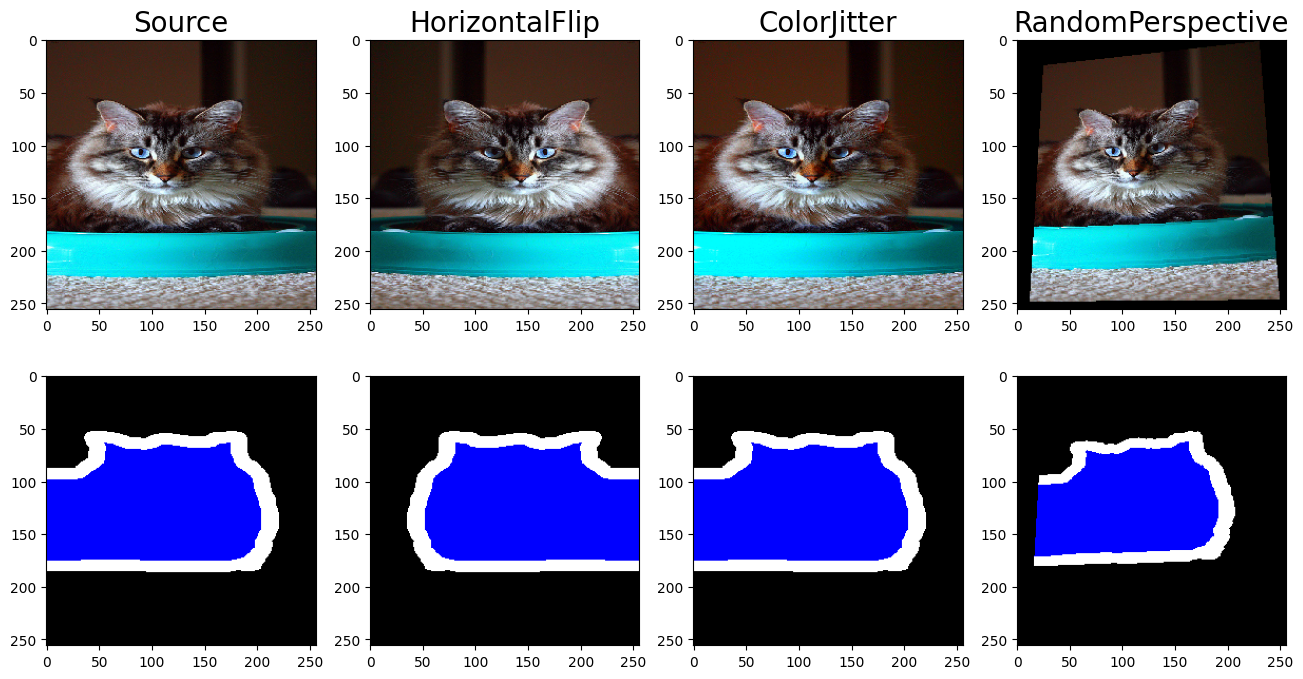

In [6]:
img_idx = np.random.randint(0, 100)
f, ax = plt.subplots(2, 4, figsize=(16, 8))
pair = train_data_hdf5[img_idx]

imgs2draw = {"Source": pair,
            "HorizontalFlip": HorizontalFlip(1.0)(pair),
            "ColorJitter": ColorJitter(1.0, (0.4, 0.4, 0.4))(pair),
            "RandomPerspective": RandomPerspective(1.0, 0.25)(pair)
}
for idx, (name, pair) in enumerate(imgs2draw.items()):
    ax[0, idx].imshow(pair[0])
    ax[0, idx].set_title(name, fontsize=20)
    ax[1, idx].imshow(colorize(np.array(pair[1])))

plt.show()

–î–∞–ª–µ–µ –æ–ø–∏—Å—ã–≤–∞–µ–º –Ω–∞—à –∫–ª–∞—Å—Å `SegmentationData` –∏ –æ–ø–µ—Ä–∞—Ü–∏–∏ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π —Ç–∏–ø–∞ PIL.Image –∫ pytorch —Ç–µ–Ω–∑–æ—Ä–∞–º —Å ImageNet `–Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–µ–π`. ImageNet –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è - —ç—Ç–æ —á–∞—Å—Ç–Ω—ã–π —Å–ª—É—á–∞–π [Standard normalization](https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html), –≤ –∫–æ—Ç–æ—Ä–æ–º –ø–æ–∫–∞–Ω–∞–ª—å–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ (—Ü–≤–µ—Ç–æ–≤—ã–µ –∫–∞–Ω–∞–ª—ã red, green, blue) –∏ –ø–æ–∫–∞–Ω–∞–ª—å–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤—ã—á–∏—Å–ª–µ–Ω—ã –Ω–∞ [–æ–≥—Ä–æ–º–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π](https://en.wikipedia.org/wiki/ImageNet).

**–û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å:** `–ê –¥–ª—è —á–µ–≥–æ –Ω—É–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—é –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º?`

**–í–∞—à –æ—Ç–≤–µ—Ç:** –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –Ω—É–∂–Ω–∞ –¥–ª—è –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –û–Ω–∞ —É—Å–∫–æ—Ä—è–µ—Ç —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å, –ø–æ–º–æ–≥–∞–µ—Ç –æ—Ç –∑–∞—Ç—É—Ö–∞—é—â–∏—Ö –∏ –≤–∑—Ä—ã–≤–∞—é—â–∏—Ö—Å—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤

In [7]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏–π (!–∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ GPU!)
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–∏ –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∫–∞—Ä—Ç–∏–Ω–æ–∫ –≤ —Ç–µ–Ω–∑–æ—Ä–∞ –∏ –æ–±—Ä–∞—Ç–Ω–æ (–¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –∏ –æ–±—É—á–µ–Ω–∏—è)
t_dict = {
    "forward_input": transforms.Compose([
        transforms.PILToTensor(),
        transforms.Lambda(lambda x: x.float().to(DEVICE)/255.0),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]),
    "backward_input": transforms.Compose([
        transforms.Normalize(mean=[0.0, 0.0, 0.0],
                                     std=[1./0.229, 1./0.224, 1./0.225]),
        transforms.Normalize(mean=[-0.485, -0.456, -0.406],
                                     std=[1.0, 1.0, 1.0]),
        transforms.Lambda(lambda x: x.permute(1, 2, 0).cpu().numpy())
    ]),
    "forward_target": transforms.Compose([
        transforms.PILToTensor(),
        transforms.Lambda(lambda x: x.long().squeeze().to(DEVICE)),
    ]),
    "backward_target": transforms.Compose([
        transforms.Lambda(lambda x: x.cpu().numpy())
    ]),
    "augment": transforms.Compose([
        HorizontalFlip(0.5),
        ColorJitter(0.5, (0.4, 0.4, 0.4)),
        RandomPerspective(0.5, 0.25)
    ]),
}


class SegmentationDataset(Dataset):
    def __init__(self, dataset_raw: Type[storage_class], transforms: dict, train_flag: bool = True):
        """
        –ù–∞—Å–ª–µ–¥—É–µ–º –≤–µ—Å—å —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª –∏–∑ `Dataset` –¥–ª—è –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö `dataset_raw`
        `transforms` —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è PIL.Image <-> torch.tensor –∏ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
        `train_flag` —Ä–µ–≥—É–ª–∏—Ä—É–µ—Ç –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏—é –¥–∞–Ω–Ω—ã—Ö (–¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –æ–Ω–∞ –Ω–µ –Ω—É–∂–Ω–∞)
        """
        super().__init__()
        self.dataset_raw = dataset_raw
        self.transforms = transforms
        self.train_flag = train_flag

    def __len__(self):
        return self.dataset_raw.dataset_size

    def __getitem__(self, idx: int) -> tuple[Image_t, Image_t]:
        input, target = self.dataset_raw[idx]

        if (self.train_flag):
            input, target = self.transforms["augment"]((input, target))

        return self.transforms["forward_input"](input), self.transforms["forward_target"](target)

In [9]:
from torch.utils.data import random_split

# –†–∞–∑–¥–µ–ª—è–µ–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é
def split_train_val(train_data: Type[storage_class], train_portion: float = 0.8):
    """
    `train_data` –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    `train_portion` –¥–æ–ª—è –æ–±—ä–µ–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –ø—Ä–∏—Ö–æ–¥–∏—Ç—å—Å—è –Ω–∞ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É
    """
    trainval_dataset = SegmentationDataset(train_data, t_dict, train_flag=True)

    train_size = int(len(trainval_dataset) * train_portion)
    val_size = len(trainval_dataset) - train_size
    return random_split(trainval_dataset, [train_size, val_size])

train_dataset_hdf5, val_dataset_hdf5 = split_train_val(train_data_hdf5)
train_dataset_memmap, val_dataset_memmap = split_train_val(train_data_memmap)
train_dataset_raw, val_dataset_raw = split_train_val(train_data_raw)

–û—Ç—Ä–∏—Å—É–µ–º —Å–ª—É—á–∞–π–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (–ø–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏):

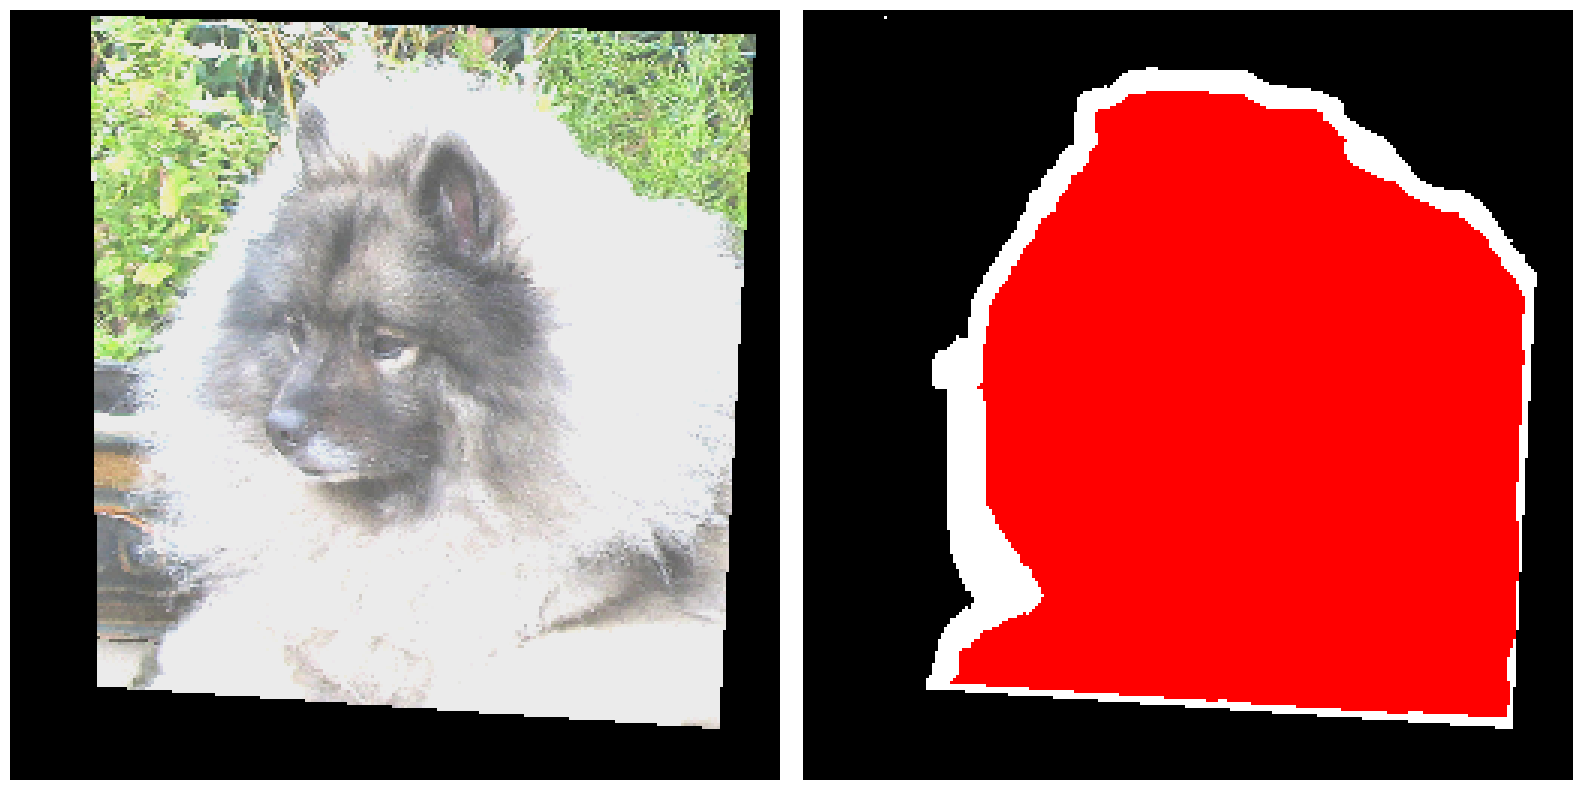

In [10]:
img_idx = np.random.randint(0, 100)
draw(train_dataset_hdf5[img_idx], t_dict);

In [11]:
dataloader_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 0
}
train_dataloader_hdf5 = DataLoader(train_dataset_hdf5, **dataloader_config)
val_dataloader_hdf5 = DataLoader(val_dataset_hdf5, **dataloader_config)

train_dataloader_memmap = DataLoader(train_dataset_memmap, **dataloader_config)
val_dataloader_memmap = DataLoader(val_dataset_memmap, **dataloader_config)

train_dataloader_raw = DataLoader(train_dataset_raw, **dataloader_config)
val_dataloader_raw = DataLoader(val_dataset_raw, **dataloader_config)

### 1.3 –ó–∞–º–µ—Ä —Å–∫–æ—Ä–æ—Å—Ç–∏ —á—Ç–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ —Å –¥–∏—Å–∫–∞ (0.5 –±–∞–ª–ª–∞)

**–ó–∞–º–µ—Ä—å—Ç–µ –≤—Ä–µ–º—è —á—Ç–µ–Ω–∏—è –Ω–∞—à–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ —Ñ–æ—Ä–º–∞—Ç–æ–≤ —Ö—Ä–∞–Ω–µ–Ω–∏—è:** (–í—Å–µ SpeedTests –≤–º–µ—Å—Ç–µ –∑–∞–Ω–∏–º–∞—é—Ç –æ–∫–æ–ª–æ 6 –º–∏–Ω—É—Ç!)

In [11]:
def speedtest(dataloader: Type[DataLoader]) -> None:
    for batch in dataloader:
        pass

In [ ]:
%timeit speedtest(train_dataloader_hdf5)

18.9 s ¬± 2.09 s per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit speedtest(train_dataloader_memmap)

16.1 s ¬± 489 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit speedtest(train_dataloader_raw)

19.4 s ¬± 634 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


**–û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å: `–ö–∞–∫–æ–π —Ñ–æ—Ä–º–∞—Ç –æ–∫–∞–∑–∞–ª—Å—è —Å–∞–º—ã–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º –ø–æ —Å–∫–æ—Ä–æ—Å—Ç–∏? –ü–æ—á–µ–º—É?`**

**–í–∞—à –æ—Ç–≤–µ—Ç:** –°–∞–º—ã–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º –ø–æ —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–∫–∞–∑–∞–ª—Å—è —Ñ–æ—Ä–º–∞—Ç Memory-mapping, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å —ç—Ç–∞–ø –±—É—Ñ—Ñ–µ—Ä–∏–∑–∞—Ü–∏–∏, —Ç–µ–º —Å–∞–º—ã–º –ø—Ä–æ–ø—É—Å–∫–∞—è –æ–ø–µ—Ä–∞—Ü–∏—é –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è, –ª–µ–Ω–∏–≤–æ –∑–∞–≥—Ä—É–∂–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –Ω–∞–ø—Ä—è–º—É—é

**–°–æ–∑–¥–∞–π—Ç–µ —Ç–µ—Å—Ç–æ–≤—ã–π Dataloader –ø–æ–±–µ–¥–∏–≤—à–µ–≥–æ –ø–æ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Ñ–æ—Ä–º–∞—Ç–∞.**

In [12]:
dataloader_config = {
    "batch_size": 16,
    "shuffle": False,
    "num_workers": 0
}
# –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ: `config_test`, `prepare_dataset`, `SegmentationDataset`, –Ω–æ–≤—ã–π `dataloader_config`
test_data_memmap = prepare_dataset(config_test, storage_memmap)
test_dataset = SegmentationDataset(test_data_memmap, t_dict, train_flag=True)
test_dataloader = DataLoader(test_dataset, **dataloader_config)

# –¥–æ–±–∞–≤—å—Ç–µ –Ω–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –≤—ã–±—Ä–∞–Ω–Ω—ã–º —Ñ–æ—Ä–º–∞—Ç–æ–º
train_dataloader = train_dataloader_memmap
val_dataloader = val_dataloader_memmap


  0%|          | 0/8 [00:00<?, ?it/s]

## –ß–∞—Å—Ç—å 2: –†–µ–∞–ª–∏–∑–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ç–µ—Ä—å, –º–µ—Ç—Ä–∏–∫ –∏ –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ PSPNet

–†–∞–Ω–µ–µ –≤–∞—Å –ø–æ–∑–Ω–∞–∫–æ–º–∏–ª–∏ —Å –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–æ–π Unet - —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–º–∏ –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–æ–º, –ø—Ä–∏–º–µ–Ω—è–µ–º–æ–º –≤ –æ–±–ª–∞—Å—Ç–∏ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π. –í –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –º—ã —Ä–∞–∑–±–µ—Ä–µ–º –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É —Å–µ—Ç–∏ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ [PSPNet](https://arxiv.org/abs/1612.01105). –û—Ç–ª–∏—á–∏—Ç–µ–ª—å–Ω–æ–π –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é —ç—Ç–æ–π —Å–µ—Ç–∏ —è–≤–ª—è–µ—Ç—Å—è `Pyramid Pooling Module`, –∫–æ—Ç–æ—Ä—ã–π, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç Unet, –ø–æ–∑–≤–æ–ª—è–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å `–≥–ª–æ–±–∞–ª—å–Ω—ã–π` –∫–æ–Ω—Ç–µ–∫—Å—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø—Ä–∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –µ–≥–æ `–ª–æ–∫–∞–ª—å–Ω—ã—Ö` –æ–±–ª–∞—Å—Ç–µ–π.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–µ–¥–ª–∞–≥–∞–µ–º—É—é –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É `PSPNet-–ø–æ–¥–æ–±–Ω–æ–π —Å–µ—Ç–∏`:
![picture](https://drive.google.com/uc?id=1WNumWndaJAbZBch0dLf6iT8KiSdUbIFG)

–í –∫–∞—á–µ—Å—Ç–≤–µ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ `Encoder` –±—É–¥–µ–º –±—Ä–∞—Ç—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é [ResNeXt](https://pytorch.org/hub/pytorch_vision_resnext/) —Å–µ—Ç—å. –ë—É–¥–µ–º –µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–≤—É—Ö –≥–ª—É–±–∏–Ω–Ω—ã—Ö –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–π –Ω–∞—à–µ–≥–æ –≤—Ö–æ–¥–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è `x`:
- **–≤—ã—Ö–æ–¥ `x_main`** (–Ω–∞ —Ä–∏—Å—É–Ω–∫–µ: –≤–µ—Ä—Ö–Ω–∏–π –≤—ã—Ö–æ–¥ Encoder-–∞ ) - "—Å—Ä–µ–¥–Ω–µ–µ" –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ, –∫–æ–º–ø—Ä–æ–º–∏—Å—Å –º–µ–∂–¥—É –Ω–∏–∑–∫–æ—É—Ä–æ–≤–Ω–µ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ (—Ü–≤–µ—Ç, –∫–æ–Ω—Ç—É—Ä—ã –æ–±—ä–µ–∫—Ç–æ–≤, —à—Ç—Ä–∏—Ö–∏) –∏ –≤—ã—Å–æ–∫–æ—É—Ä–æ–≤–Ω–µ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ (–∞–±—Å—Ç—Ä–∞–∫—Ç–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –æ—Ç—Ä–∞–∂–∞—é—â–∏–µ —Å–µ–º–∞–Ω—Ç–∏–∫—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è)
- **–≤—ã—Ö–æ–¥ `x_supp`** (–Ω–∞ —Ä–∏—Å—É–Ω–∫–µ: –Ω–∏–∂–Ω–∏–π –≤—ã—Ö–æ–¥ Encoder-–∞ ) - —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ, —Å–æ–¥–µ—Ä–∂–∞—â–µ–µ —Å–∞–º—ã–µ –≤—ã—Å–æ–∫–æ—É—Ä–æ–≤–Ω–µ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É—Ç–µ—Ä—è–Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–æ—á–Ω–æ–º –ø—Ä–æ—Å—Ç–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–∏ –æ–±—ä–µ–∫—Ç–æ–≤

–ü–æ–¥–æ–±–Ω–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ –≤—ã—Ö–æ–¥–∞ –Ω–∞ 2 –ø–æ—Ç–æ–∫–∞ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å—é –≤ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–∏ –æ–±—ä–µ–∫—Ç–æ–≤ (`x_main`) –∏ –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ —Å–µ–º–∞–Ω—Ç–∏–∫–µ –≤—Å–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ —Ü–µ–ª–æ–º (`x_supp`) –¥–ª—è –∑–∞–¥–∞—á–∏ —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏. –ú—ã –Ω–µ –º–æ–∂–µ–º —Å–µ–±–µ –ø–æ–∑–≤–æ–ª–∏—Ç—å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–∏—à—å –≤—ã—Ö–æ–¥ `x_supp`, –∫–∞–∫ —ç—Ç–æ –¥–µ–ª–∞–µ—Ç—Å—è, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ –∑–∞–¥–∞—á–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏, –≤–µ–¥—å –æ—Ç –Ω–∞—Å —Ç—Ä–µ–±—É–µ—Ç—Å—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∑–Ω–∞–Ω–∏–µ –æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–∏ —ç—Ç–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –Ω–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏.

**–í–∞—à–∞ –∑–∞–¥–∞—á–∞ —Å–æ—Å—Ç–æ–∏—Ç –≤ –Ω–∞–ø–∏—Å–∞–Ω–∏–∏ –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ `Decoder`, –∞ –∏–º–µ–Ω–Ω–æ –≤ –Ω–∞–ø–∏—Å–∞–Ω–∏–∏ –±–ª–æ–∫–æ–≤:**
- **`Pyramid Pooling Module`**. –≠—Ç–∞ –ø—Ä–æ—Ü–µ–¥—É—Ä–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–∞ –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ —Ä–∞–∑–Ω—ã—Ö –º–∞—Å—à—Ç–∞–±–æ–≤, –∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–º —Å–≤–µ—Ä—Ç–æ—á–Ω—ã–º –Ω–µ–π—Ä–æ–Ω–Ω—ã–º —Å–µ—Ç—è–º (–ª–æ–∫–∞–ª—å–Ω—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö —Ä–∞–∑–º–µ—Ä–∞ —Ñ–∏–ª—å—Ç—Ä–∞).
    * –ö –≤—Ö–æ–¥–Ω–æ–º—É —Ç–µ–Ω–∑–æ—Ä—É `x_main` –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ü–∏–π –ø—É–ª–∏–Ω–≥–∞ —Ä–∞–∑–Ω—ã—Ö –º–∞—Å—à—Ç–∞–±–æ–≤ –∏ –ø–æ–ª—É—á–∞—é—Ç—Å—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è —Ç–∞–∫–∏—Ö —Ä–∞–∑–º–µ—Ä–æ–≤: `1x1`, `2x2`, `3x3` –∏ `6x6`.
    * –ö–∞–Ω–∞–ª—ã —ç—Ç–∏—Ö –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö —Ç–µ–Ω–∑–æ—Ä–æ–≤ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ —Å–∂–∏–º–∞–µ–º (–ø—Ä–∏ –ø–æ–º–æ—â–∏ `nn.Conv2d c —Ä–∞–∑–º–µ—Ä–æ–º —Ñ–∏–ª—å—Ç—Ä–∞ 1x1`). –î–µ–ª–∞–µ–º —ç—Ç–æ –¥–ª—è —Å–∂–∞—Ç–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∞ —Ç–∞–∫–∂–µ –¥–ª—è –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ–≥–æ –≤–∑–≤–µ—à–∏–≤–∞–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ–Ω–∑–æ—Ä–∞ (–Ω–∞–∑–æ–≤–µ–º –∏—Ö —Ç–µ–Ω–∑–æ—Ä–∞–º–∏ –≥–ª–æ–±–∞–ª—å–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ —Ä–∞–∑–Ω–æ–≥–æ –º–∞—Å—à—Ç–∞–±–∞).
    * –ó–∞—Ç–µ–º –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ç–µ–Ω–∑–æ—Ä—ã –¥–æ –∏—Å—Ö–æ–¥–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏.
    * –í—ã—Ö–æ–¥–Ω–æ–π —Ç–µ–Ω–∑–æ—Ä –ø–æ–ª—É—á–∞–µ–º –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏–µ–π —ç—Ç–∏—Ö –≥–ª–æ–±–∞–ª—å–Ω—ã—Ö –∫–æ–Ω—Ç–µ–∫—Å—Ç–æ–≤. –ö–∞–∂–¥—ã–π –∫–æ–Ω—Ç–µ–∫—Å—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –≤—Å–µ–º –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–∏ —Å —Ä–∞–∑–Ω—ã–º–∏ —É—Ä–æ–≤–Ω—è–º–∏ –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–∏. –¢—Ä–µ–±—É–µ—Ç—Å—è —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å `forward` —ç—Ç–∞–ø —ç—Ç–æ–≥–æ –±–ª–æ–∫–∞. –î–ª—è —É—Ç–æ—á–Ω–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –æ–±—Ä–∞—Ç–∏—Ç—å—Å—è –∫ [—Å—Ç–∞—Ç—å–µ](https://arxiv.org/abs/1612.01105).
- **`Supplementary Module`** –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–∞–¥ –≤—Ö–æ–¥–Ω—ã–º —Ç–µ–Ω–∑–æ—Ä–æ–º `x_supp` —Å –ø–æ–Ω–∏–∂–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ –∫–∞–Ω–∞–ª–æ–≤ –¥–æ —á–∏—Å–ª–∞ –Ω–∞ –≤—ã—Ö–æ–¥–µ –º–æ–¥—É–ª—è **`Pyramid Pooling Module`**. –í–∞—Ä–∏–∞–Ω—Ç –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã —ç—Ç–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è (–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ —Å–ª–æ–µ–≤) —É–∂–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω, –Ω–æ, –ø—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏, –≤—ã –º–æ–∂–µ—Ç–µ —Å –Ω–∏–º —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å
- **`Upsample Module`** –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –Ω–∞–¥ –≤—Ö–æ–¥–Ω—ã–º —Ç–µ–Ω–∑–æ—Ä–æ–º —Å –ø–æ–Ω–∏–∂–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ –∫–∞–Ω–∞–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —á–µ—Ä–µ–¥—É—é—Ç—Å—è —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º —Å –ø–æ–º–æ—â—å—é –∏–Ω—Ç–µ—Ä–ø–æ–ª—è—Ü–∏–∏ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π –≤ 2 —Ä–∞–∑–∞. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –≤—ã—Ö–æ–¥ —ç—Ç–æ–≥–æ –±–ª–æ–∫–∞ –∏–º–µ–µ—Ç —Ç—É –∂–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å, —á—Ç–æ –∏ –≤—Ö–æ–¥–Ω–æ–µ –≤ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ.
- **`Segmentation Head`** –Ω–µ–ª–∏–Ω–µ–π–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –≤—Ö–æ–¥–Ω–æ–π —Ç–µ–Ω–∑–æ—Ä –≤ —Ç–µ–Ω–∑–æ—Ä score'–æ–≤. –í—ã—Ö–æ–¥–Ω–æ–π —Ç–µ–Ω–∑–æ—Ä –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∏–∫—Å–µ–ª—è –∏–º–µ–µ—Ç `num_classes` score'–æ–≤ (–≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ 3). –ò–Ω–¥–µ–∫—Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ score'–∞ –¥–ª—è –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –ø–∏–∫—Å–µ–ª—è –µ—Å—Ç—å –µ–≥–æ –º–µ—Ç–∫–∞ –∫–ª–∞—Å—Å–∞ (0, 1 –∏–ª–∏ 2).

### 2.1 –ö–æ–¥–∏—Ä–æ–≤—â–∏–∫ –∏ –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ PSPNet-–ø–æ–¥–æ–±–Ω–æ–π —Å–µ—Ç–∏ (3 –±–∞–ª–ª–∞)

In [13]:
from torchvision.models.resnet import ResNet

pretrained_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnext50_32x4d', pretrained=True)

# –í—ã—Å—Ç–∞–≤–ª—è–µ–º evaluation mode (–≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–≤–µ–¥–µ–Ω–∏–µ —Ç–∞–∫–∏—Ö —Å–ª–æ–µ–≤ –∫–∞–∫ BatchNorm2d, Dropout)
pretrained_model.eval();

Using cache found in C:\Users\user/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\user\anaconda3\envs\conda_env_24_25\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


–¢–∞–∫ –∫–∞–∫ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π, —Ç–æ —Ç—Ä–µ–±—É–µ—Ç—Å—è –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å (–∑–∞–º–æ—Ä–æ–∑–∏—Ç—å) –≤–µ—Å–∞, —á—Ç–æ–±—ã –ø–æ –Ω–∏–º –Ω–µ —Ç–µ–∫ –≥—Ä–∞–¥–∏–µ–Ω—Ç. –≠—Ç–∏–º –º—ã –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ–º, —á—Ç–æ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –Ω–µ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –≤ —Ö–æ–¥–µ –æ–±—É—á–µ–Ω–∏—è –∞–≤—Ç–æ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞, –∞ —Ç–∞–∫–∂–µ —ç–∫–æ–Ω–æ–º–∏–º –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–µ—Å—É—Ä—Å—ã (–≥—Ä–∞—Ñ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ –Ω–µ —Å—Ç—Ä–æ–∏—Ç—Å—è).

In [14]:
class EncoderBlock(nn.Module):
    def __init__(self, pretrained_model: Type[ResNet]):
        """
        –ò–∑–≤–ª–µ–∫–∞–µ—Ç –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–µ –∏–º–µ–Ω–æ–≤–∞–Ω–Ω—ã–µ —Å–ª–æ–∏ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞ `pretrained_model`
        –†–∞–∑–¥–µ–ª—è–µ—Ç —Å–ª–æ–∏ –Ω–∞ `main` –∏ `supp` –ø–æ—Ç–æ–∫–∏ (—Å–º. –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –≤—ã—à–µ)

        –í—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, 3, Height, Width)

        –í—ã—Ö–æ–¥: x_main —Ç–µ–Ω–∑–æ—Ä (Batch_size, 512, Height // 8, Width // 8)
        –í—ã—Ö–æ–¥: x_supp —Ç–µ–Ω–∑–æ—Ä (Batch_size, 2048, Height // 32, Width // 32)
        """
        super().__init__()

        self.encoder_main = nn.Sequential()
        for name, child in list(pretrained_model.named_children())[:-4]:
            print(f"Pretrained main module {name} is loaded")
            self.encoder_main.add_module(name, child)

        self.encoder_supp = nn.Sequential()
        for name, child in list(pretrained_model.named_children())[-4:-2]:
            print(f"Pretrained supp module {name} is loaded")
            self.encoder_supp.add_module(name, child)

    def freeze(self) -> None:
        """
        –ó–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ—Ç –≤–µ—Å–∞ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
        """
        for p in self.parameters():
            p.requires_grad = False
        self.eval()

    def unfreeze(self) -> None:
        """
        –†–∞–∑–º–æ—Ä–∞–∂–∏–≤–∞–µ—Ç –≤–µ—Å–∞ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
        """
        for p in self.parameters():
            p.requires_grad = True
        self.train()

    def forward(self, x: torch.tensor) -> tuple[torch.tensor, torch.tensor]:
        x_main = self.encoder_main(x)
        x_supp = self.encoder_supp(x_main)
        return x_main, x_supp

In [15]:
encoder = EncoderBlock(pretrained_model)

Pretrained main module conv1 is loaded
Pretrained main module bn1 is loaded
Pretrained main module relu is loaded
Pretrained main module maxpool is loaded
Pretrained main module layer1 is loaded
Pretrained main module layer2 is loaded
Pretrained supp module layer3 is loaded
Pretrained supp module layer4 is loaded


**–î–ª—è –æ—Ü–µ–Ω–∫–∏ —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è —Ñ—É–Ω–∫—Ü–∏—è –ø–æ–¥—Å—á–µ—Ç–∞ —á–∏—Å–ª–∞ –µ–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –¥–ª—è —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥ [model.parameters()](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters). –†–µ–∞–ª–∏–∑—É–π—Ç–µ –µ–µ –Ω–∏–∂–µ:**

In [16]:
def count_parameters(model: Type[nn.Module]) -> int:
    """
    –°—á–∏—Ç–∞–µ—Ç —á–∏—Å–ª–æ –≤–µ—Å–æ–≤ –≤ –º–æ–¥–µ–ª–∏ `model`, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö —Ç—Ä–µ–±—É–µ—Ç—Å—è –≥—Ä–∞–¥–∏–µ–Ω—Ç
    * –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ model.parameters() —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Å–ø–∏—Å–æ–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:
        https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.parameters
    * –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ requires_grad, –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏, —Å—á–∏—Ç–∞–µ—Ç—Å—è –ª–∏ –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç:
        https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html#torch.nn.parameter.Parameter
    """
    total_params = 0
    requires_grad_params = list(filter(lambda p: p.requires_grad, model.parameters()))
    total_params = sum([param.numel() for param in requires_grad_params])
    return total_params

–£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –º–µ—Ç–æ–¥ `.freeze()` —É—Å–ø–µ—à–Ω–æ –∑–∞–º–æ—Ä–∞–∂–∏–≤–∞–µ—Ç –≤–µ—Å–∞:

In [17]:
print("Encoder #parameters before freeze():", count_parameters(encoder))
encoder.freeze()
print("Encoder #parameters after freeze():", count_parameters(encoder))

Encoder #parameters before freeze(): 22979904
Encoder #parameters after freeze(): 0


* **–†–µ–∞–ª–∏–∑—É–π—Ç–µ `PyramidPoolingModule`, `Upsample` –∏ `SegmentationHead` (–ø–æ 1 –±–∞–ª–ª—É)**

In [18]:
class PyramidPoolingModule(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, bin_sizes: tuple[int, ...]):
        """
        –í—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `in_channels`, Height, Width)
        `bin_sizes` - –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –ø—É–ª–∏–Ω–≥ –æ–ø–µ—Ä–∞—Ü–∏–∏
        –ü—Ä–∏–º–µ—Ä: bin_sizes = (1, 2, 3, 6).

        –í—ã—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `in_channels` + len(`bin_sizes`) * `out_channels`, Height, Width)
        """
        super().__init__()
        self.bins = []

        for bin_size in bin_sizes:
            self.bins.append(nn.Sequential(
                nn.AdaptiveAvgPool2d(bin_size), # –ø–æ—á–∏—Ç–∞–π—Ç–µ: https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html
                nn.Conv2d(in_channels, out_channels, kernel_size=1), # –ø–æ—á–∏—Ç–∞–π—Ç–µ: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
                nn.BatchNorm2d(out_channels), # –ø–æ—á–∏—Ç–∞–π—Ç–µ: https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html
                nn.ReLU(inplace=True)
            ))

        self.bins = nn.ModuleList(self.bins)

    def forward(self, x: torch.tensor) -> torch.tensor:
        h, w = x.shape[2:]
        out = [x,]
        """
        * –ü—Ä–æ–π–¥–∏—Ç–µ—Å—å —Ü–∏–∫–ª–æ–º –ø–æ self.bins –∏ –ø—Ä–∏–º–µ–Ω–∏—Ç–µ –∏—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –æ—Ç–¥–µ–ª—å–Ω–æ
          –∫ –∫–∞–∂–¥–æ–º—É  –±–ª–æ–∫—É –æ–ø–µ—Ä–∞—Ü–∏–π Pooling + Conv + BatchNorm + ReLU
        * –ü–æ—Å–ª–µ –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –Ω–µ –∑–∞–±—É–¥—å—Ç–µ –Ω–∞ –∫–∞–∂–¥—ã–π –≤—ã—Ö–æ–¥ —Å–¥–µ–ª–∞—Ç—å `Upscale`
          (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ torch.functional.interpolate)
          –∏ –¥–æ–±–∞–≤–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ —Å–ø–∏—Å–æ–∫ `out`
        * –°–∫–æ–Ω–∫–∞—Ç–µ–Ω–∏—Ä—É–π—Ç–µ —Ç–µ–Ω–∑–æ—Ä—ã –∏–∑ out –≤ –æ–¥–∏–Ω –±–æ–ª—å—à–æ–π —Ç–µ–Ω–∑–æ—Ä –ø–æ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ —Å –∫–∞–Ω–∞–ª–∞–º–∏
          —Å –ø–æ–º–æ—â—å—é torch.cat
        """
        for bin in self.bins:
            applied = bin(x)
            upscaled = nn.functional.interpolate(applied, size=(h, w))
            out.append(upscaled)

        return torch.cat(out, dim=1)
            

class SupplementaryModule(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, dropout: float):
        """
        –í—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `in_channels`, Height, Width)

        –í—ã—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `out_channels`, Height, Width)
        """
        super().__init__()
        self.suppl = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=dropout),
            nn.Conv2d(in_channels // 2, out_channels, kernel_size=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.suppl(x)


class Upsample(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        """
        –í—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `in_channels`, Height, Width)

        –í—ã—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `out_channels`, 2 * Height, 2 * Width)
        """
        super().__init__()

        # –†–µ–∫–æ–º–µ–Ω–¥—É–µ–º –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å Conv2d (kernel: 3x3, padding=1) + BatchNorm2d + ReLU
        self.us_transform = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
        )
            
    def forward(self, x: torch.tensor) -> torch.tensor:
        """
        –£–≤–µ–ª–∏—á—å—Ç–µ –≤—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ –¥–≤–∞ —Ä–∞–∑–∞, –∞ –∑–∞—Ç–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç–µ us_transform
        –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ torch.functional.interpolate c mode='bilinear', align_corners=True
        """
        upscaled = nn.functional.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)
        return self.us_transform(upscaled)


class UpsampleModule(nn.Module):
    def __init__(self, in_channels: int, out_channels: int):
        """
        –í—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `in_channels`, Height, Width)

        –í—ã—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `out_channels`, 8 * Height, 8 * Width)
        """
        super().__init__()
        self.upsample = nn.Sequential(
            Upsample(in_channels, in_channels // 4),
            Upsample(in_channels // 4, in_channels // 8),
            Upsample(in_channels // 8, out_channels)
        )

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.upsample(x)

In [19]:
class DecoderBlock(nn.Module):
    def __init__(self, in_channels: int, out_channels: int, bin_sizes: tuple[int, ...], dropout: float = 0.1):
        """
        –í—Ö–æ–¥ ¬†x_main: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `in_channels`, Height, Width)
        –í—Ö–æ–¥ ¬†x_supp: —Ç–µ–Ω–∑–æ—Ä (Batch_size, 4 * `in_channels`, Height // 4, Width // 4)

        –í—ã—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `out_channels`, 8 * Height, 8 * Width)
        """
        super().__init__()
        assert in_channels % len(bin_sizes) == 0

        self.PPM = PyramidPoolingModule(in_channels, in_channels // len(bin_sizes), bin_sizes)
        self.SM = SupplementaryModule(4 * in_channels, 2 * in_channels, dropout)
        self.UM = UpsampleModule(4 * in_channels, out_channels)

    def forward(self, x_main: torch.tensor, x_supp: torch.tensor) -> torch.tensor:
        h_supp, w_supp = x_supp.shape[2:]
        x_supp = F.interpolate(input=x_supp, size=(4 * h_supp, 4 * w_supp), mode='bilinear', align_corners=True)

        x_supp = self.SM(x_supp)
        x_main = self.PPM(x_main)

        out = self.UM(torch.cat([x_main, x_supp], dim=1))
        return out


class SegmentationHead(nn.Module):
    def __init__(self, in_channels: int, num_classes: int, dropout: float = 0.1):
        """
        –í—ã—á–∏—Å–ª—è–µ—Ç score –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –∫–ª–∞—Å—Å–æ–≤
        –í—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `in_channels`, Height, Width)

        –í—ã—Ö–æ–¥: —Ç–µ–Ω–∑–æ—Ä (Batch_size, `num_classes`, Height, Width)
        """
        super().__init__()
        # –†–µ–∫–æ–º–µ–Ω–¥—É–µ–º –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å: BatchNorm2d + ReLU + Dropout2d + Conv2d (1 x 1)
        self.segmentation_head = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=dropout),
            nn.Conv2d(in_channels, num_classes, kernel_size=1)
        )

    def forward(self, x: torch.tensor, x_supp: torch.tensor) -> torch.tensor:
        """
        –ù–∞ –±—É–¥—É—â–µ–µ –∑–∞–¥–∞–¥–∏–º —Ñ–∏–∫—Ç–∏–≤–Ω—ã–π –∞—Ä–≥—É–º–µ–Ω—Ç `x_supp`, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∫–∞ –Ω–µ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å
        """
        return self.segmentation_head(x)

### 2.2 –†–µ–∞–ª–∏–∑–∞—Ü–∏—è –º–µ—Ç—Ä–∏–∫ (3.5 –±–∞–ª–ª–∞)

–í –∑–∞–¥–∞—á–µ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏, –≤ –æ—Å–Ω–æ–≤–Ω–æ–º, –∏—Å–ø–æ–ª—å–∑—É—é—Ç —Å–ª–µ–¥—É—é—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏:

–ü—É—Å—Ç—å $\mathrm{P}$ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç –ø—Ä–æ–≥–Ω–æ–∑ —Å–µ–≥. –º–∞—Å–∫–∏ (Prediction), $\mathrm{S}$ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç score'—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Å–µ–≥. –º–∞—Å–∫–∏ (Scores), –∞ $\mathrm{T}$ –æ–∑–Ω–∞—á–∞–µ—Ç —Å–µ–≥. –º–∞—Å–∫—É (Target). –¢–æ–≥–¥–∞:
- **Intersection over Union metric (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ñ–∞–∫–∫–∞—Ä–∞)**:
$$
\mathrm{IoU}(P, T) = \dfrac{\sum_{i=1}^{M}\sum_{j=1}^{N}[P_{ij}*T_{ij}]}{\sum_{i=1}^{M}\sum_{j=1}^{N} [P_{ij} + T_{ij} - P_{ij}*T_{ij}]}\text{, –≥–¥–µ } P, T \in \{0, 1\}^{M \times N}
$$
- **Recall metric (–ø–æ–ª–Ω–æ—Ç–∞)**:
$$
\mathrm{Recall}(P, T) = \dfrac{\sum_{i=1}^{M}\sum_{j=1}^{N}[P_{ij} * T_{ij}]}{\sum_{i=1}^{M}\sum_{j=1}^{N} T_{ij}}\text{, –≥–¥–µ } P, T \in \{0, 1\}^{M \times N}
$$
–£–∫–∞–∑–∞–Ω–Ω—ã–µ –≤—ã—à–µ –º–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å–ø–∏—Å–∞–Ω—ã –¥–ª—è —Å–ª—É—á–∞—è –±–∏–Ω–∞—Ä–Ω–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞–º –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç. –û–±–æ–±—â–∏–º –∏—Ö –Ω–∞ —Å–ª—É—á–∞–π –º—É–ª—å—Ç–∏–∫–ª–∞—Å—Å–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏: –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–º K-–∫–ª–∞—Å—Å–æ–≤—É—é –∑–∞–¥–∞—á—É –∫–∞–∫ K –¥–≤—É—Ö–∫–ª–∞—Å—Å–æ–≤—ã—Ö, –∞ –∑–∞—Ç–µ–º `–º–∞–∫—Ä–æ-` –∏–ª–∏ `–º–∏–∫—Ä–æ-`—É—Å—Ä–µ–¥–Ω–∏–º –¥–ª—è –Ω–∏—Ö –º–µ—Ç—Ä–∏–∫–∏. **–¢—Ä–µ–±—É–µ—Ç—Å—è —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –º—É–ª—å—Ç–∏–∫–ª–∞—Å—Å–æ–≤—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã —É–∫–∞–∑–∞–Ω–Ω—ã—Ö –º–µ—Ç—Ä–∏–∫ —Å –ø–æ–¥–¥–µ—Ä–∂–∫–æ–π –º–∞–∫—Ä–æ- –∏ –º–∏–∫—Ä–æ-—É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è (–ø–æ 1 –±–∞–ª–ª—É). –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –º–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞ –∏–∑ –±–∞—Ç—á–∞. –ó–∞ —Ä–µ–¥—É—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –≤–¥–æ–ª—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –±–∞—Ç—á–∞ –æ—Ç–≤–µ—á–∞–µ—Ç –∞—Ä–≥—É–º–µ–Ω—Ç `reduce` (—Å–º. –Ω–∏–∂–µ).**

–¢–∞–∫–∂–µ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–≤–µ —Ä–∞–∑–Ω—ã–µ, –Ω–æ —Å—Ö–æ–∂–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å:
- Cross Entropy Loss (–∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è):
$$
\mathrm{CE}(S, T) = - \dfrac{1}{MN}\sum_{c=1}^{K}\sum_{i=1}^{M}\sum_{j=1}^{N} \big[\log \mathrm{Softmax}(S)_{cij}*\mathbb{I}[T_{ij} == c]\big]\text{, –≥–¥–µ } S \in \mathbb{R}^{K \times M \times N}, T \in \{1, ..., K\}^{M \times N}
$$
- [Focal Loss](https://arxiv.org/abs/1708.02002):
$$
\mathrm{FL}(S, T) = - \dfrac{1}{MN}\sum_{c=1}^{K}\sum_{i=1}^{M}\sum_{j=1}^{N} \big[(1 - \mathrm{Softmax}(S)_{cij})^{\gamma}*\log \mathrm{Softmax}(S)_{cij}*\mathbb{I}[T_{ij} == c]\big]\text{, –≥–¥–µ } S \in \mathbb{R}^{K \times M \times N}, T \in \{1, ..., K\}^{M \times N}, \gamma \in \mathbb{R}_{+} - \text{–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä}
$$

**–§—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å —Ä–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞—Ç—å –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è**. –¢–∞–∫–∂–µ –≤—Å—é–¥—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±–µ—Å–ø–µ—á–∏—Ç—å –∫–æ—Ä—Ä–µ–∫—Ç–Ω—É—é –æ–±—Ä–∞–±–æ—Ç–∫—É –∑–Ω–∞—á–µ–Ω–∏–π `ignore_index`, –∫–æ—Ç–æ—Ä—ã–µ –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —Ä–∞–≤–Ω—ã 255 (–Ω–µ —É—á–∞—Å—Ç–≤—É—é—Ç –≤ —Ä–∞—Å—á–µ—Ç–µ –º–µ—Ç—Ä–∏–∫/—Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ç–µ—Ä—å). –ï—Å–ª–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∫–ª–∞—Å—Å–æ–≤ –≤ $\mathrm{T}$ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, —Ç–æ —É—á–∏—Ç—ã–≤–∞—Ç—å —ç—Ç–∏ –∫–ª–∞—Å—Å—ã –ø—Ä–∏ –º–∞–∫—Ä–æ-—É—Å—Ä–µ–¥–Ω–µ–Ω–∏–∏ –Ω–µ –Ω—É–∂–Ω–æ.

In [20]:
class MetricsCollection():
    def __init__(self, num_classes: int, ignore_index: int = 255):
        self.num_classes = num_classes
        self.ignore_index = ignore_index

    def IoUMetric(self, prediction: torch.tensor, target: torch.tensor, average: str = "macro", reduce: str = "mean") -> Union[torch.tensor, float]:
        """
        `prediction` –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, Height, Width)
        `target` –∏—Å—Ç–∏–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, Height, Width)
        `average` —Ç–∏–ø –º—É–ª—å—Ç–∫–ª–∞—Å—Å–æ–≤–æ–≥–æ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è
        `reduce` —Ä–µ–¥—É–∫—Ü–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –º–µ—Ç—Ä–∏–∫–∏ –≤–¥–æ–ª—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ Batch; None - –±–µ–∑ —Ä–µ–¥—É–∫—Ü–∏–∏
        """

        """
        micro - —Å—É–º–º–∏—Ä—É–µ–º –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—å –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤, —á–∏—Å–ª–∏—Ç–µ–ª—å –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤
                –∏ –¥–µ–ª–∏–º –æ–¥–Ω–æ –Ω–∞ –¥—Ä—É–≥–æ–µ
        macro - —Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫—É –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É –æ—Ç–¥–µ–ª—å–Ω–æ, –∑–∞—Ç–µ–º —É—Å—Ä–µ–¥–Ω—è–µ–º
        """
        assert average in ["micro", "macro"]

        """
        sum - —Å—É–º–º–∞ –º–µ—Ç—Ä–∏–∫ –ø–æ –≤—Å–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º
        mean - —Å—Ä–µ–¥–Ω–µ–µ –º–µ—Ç—Ä–∏–∫ –ø–æ –≤—Å–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º
        none - –º–∞—Å—Å–∏–≤ –º–µ—Ç—Ä–∏–∫ –ø–æ –≤—Å–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º
        """
        assert reduce in ["sum", "mean", "none"]

        batch_size = target.shape[0]
        iou_per_batch = []

        for i in range(batch_size):
            pred = prediction[i]
            tgt = target[i]
            mask = (tgt != self.ignore_index)
            pred = pred[mask]
            tgt = tgt[mask]

            if average == 'macro':
                iou_per_class = []
                
                for cls in range(self.num_classes):
                    pred_cls = (pred == cls).float()
                    target_cls = (tgt == cls).float()
                    
                    intersection = (pred_cls * target_cls).sum()
                    union = (pred_cls + target_cls - pred_cls * target_cls).sum()
                    #union = pred_cls.sum() + target_cls.sum() - intesection
                    if union > 0:
                        iou_per_class.append(intersection / union)
                                         
                if iou_per_class:
                    iou_per_batch.append(torch.stack(iou_per_class).mean())
                else:
                    iou_per_batch.append(torch.tensor(0.0))
                       
            elif average == 'micro':
                intersection = sum(((pred == cls).float() * (tgt == cls).float()).sum() for cls in range(self.num_classes))
                union = sum(((pred == cls).float() + (tgt == cls).float() - (pred == cls).float() * (tgt == cls).float()).sum()
                           for cls in range(self.num_classes))
                iou_per_batch.append(intersection / union) if union > 0 else torch.tensor(0.0)

        iou = torch.stack(iou_per_batch)
        
        if reduce == 'sum':
            return iou.sum()
        elif reduce == 'mean':
            return iou.mean()
        else:
            return iou
        

    def RecallMetric(self, prediction: torch.tensor, target: torch.tensor, average: str = "macro", reduce: str = "mean") -> Union[torch.tensor, float]:
        """
        `prediction` –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, Height, Width)
        `target` –∏—Å—Ç–∏–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, Height, Width)
        `average` —Ç–∏–ø –º—É–ª—å—Ç–∫–ª–∞—Å—Å–æ–≤–æ–≥–æ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è
        `reduce` —Ä–µ–¥—É–∫—Ü–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –º–µ—Ç—Ä–∏–∫–∏ –≤–¥–æ–ª—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ Batch; None - –±–µ–∑ —Ä–µ–¥—É–∫—Ü–∏–∏
        """

        """
        micro - —Å—É–º–º–∏—Ä—É–µ–º –∑–Ω–∞–º–µ–Ω–∞—Ç–µ–ª—å –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤, —á–∏—Å–ª–∏—Ç–µ–ª—å –¥–ª—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤
                –∏ –¥–µ–ª–∏–º –æ–¥–Ω–æ –Ω–∞ –¥—Ä—É–≥–æ–µ
        macro - —Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫—É –ø–æ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É –æ—Ç–¥–µ–ª—å–Ω–æ, –∑–∞—Ç–µ–º —É—Å—Ä–µ–¥–Ω—è–µ–º
        """
        assert average in ["micro", "macro"]

        """
        sum - —Å—É–º–º–∞ –º–µ—Ç—Ä–∏–∫ –ø–æ –≤—Å–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º
        mean - —Å—Ä–µ–¥–Ω–µ–µ –º–µ—Ç—Ä–∏–∫ –ø–æ –≤—Å–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º
        none - –º–∞—Å—Å–∏–≤ –º–µ—Ç—Ä–∏–∫ –ø–æ –≤—Å–µ–º –∫–∞—Ä—Ç–∏–Ω–∫–∞–º
        """
        assert reduce in ["sum", "mean", "none"]

        batch_size = target.shape[0]
        recall_per_batch = []

        for i in range(batch_size):
            pred = prediction[i]
            tgt = target[i]
            mask = (tgt != self.ignore_index)
            pred = pred[mask]
            tgt = tgt[mask]
            
            if average == 'macro':
                recall_per_class = []
                
                for cls in range(self.num_classes):
                    pred_cls = (pred == cls).float()
                    target_cls = (tgt == cls).float()
                    
                    nominator = (pred_cls * target_cls).sum()
                    denominator = target_cls.sum()
        
                    if denominator > 0:
                        recall_per_class.append(nominator / denominator) 
                                         
                if recall_per_class:
                    recall_per_batch.append(torch.stack(recall_per_class).mean())
                else:
                    recall_per_batch.append(torch.tensor(0.0))
                       
            elif average == 'micro':
                nominator = sum(((pred == cls).float() * (tgt == cls).float()).sum() for cls in range(self.num_classes))
                denominator = sum((tgt == cls).float().sum() for cls in range(self.num_classes))
                recall_per_batch.append(nominator / denominator) if denominator > 0 else torch.tensor(0.0)

        recall = torch.stack(recall_per_batch)
        
        if reduce == 'sum':
            return recall.sum()
        elif reduce == 'mean':
            return recall.mean()
        else:
            return recall
        
        

    def FocalLoss(self, scores: torch.tensor, target: torch.tensor, reduce: str = "mean", gamma: float = 1.) -> Union[torch.tensor, float]:
        """
        `scores` score'—ã –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Å–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, num_classes, Height, Width)
        `target` –∏—Å—Ç–∏–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, Height, Width)
        `reduce` —Ä–µ–¥—É–∫—Ü–∏—è –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –≤–¥–æ–ª—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ Batch; None - –±–µ–∑ —Ä–µ–¥—É–∫—Ü–∏–∏
        """
        assert scores.shape[1] == self.num_classes
        assert reduce in ["sum", "mean", "none"]

        ce_loss = F.cross_entropy(scores, target, ignore_index=self.ignore_index, reduction="none")
        coef = (1 - torch.exp(-ce_loss))**gamma
        focal_loss = coef * ce_loss
        norm = (focal_loss.numel() - (target == self.ignore_index).sum())

        if (reduce == "sum"):
            return focal_loss.sum() / norm * scores.shape[0]
        elif (reduce == "mean"):
            return focal_loss.sum() / norm
        else:
            return focal_loss.sum(dim=[1, 2]) / norm * scores.shape[0]

    def CrossEntropyLoss(self, scores: torch.tensor, target: torch.tensor, reduce: str = "mean") -> Union[torch.tensor, float]:
        """
        `scores` score'—ã –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Å–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, num_classes, Height, Width)
        `target` –∏—Å—Ç–∏–Ω–Ω–∞—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Å–∫–∞ —Ä–∞–∑–º–µ—Ä–∞ (Batch_size, Height, Width)
        `reduce` —Ä–µ–¥—É–∫—Ü–∏—è –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –≤–¥–æ–ª—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ Batch; None - –±–µ–∑ —Ä–µ–¥—É–∫—Ü–∏–∏
        """
        assert scores.shape[1] == self.num_classes
        assert reduce in ["sum", "mean", "none"]

        if (reduce == "sum"):
            return F.cross_entropy(scores, target, ignore_index=self.ignore_index, reduction="mean") * scores.shape[0]
        elif (reduce == "mean"):
            return F.cross_entropy(scores, target, ignore_index=self.ignore_index, reduction="mean")
        else:
            return F.cross_entropy(scores, target, ignore_index=self.ignore_index, reduction="none")

    @classmethod
    def ListMetrics(cls):
        return [method for method in dir(cls) if (method.endswith("Metric"))]

    @classmethod
    def ListLosses(cls):
        return [method for method in dir(cls) if (method.endswith("Loss"))]

In [21]:
metric_class = MetricsCollection(num_classes=3, ignore_index=255)

prediction = torch.tensor([[[0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]],
                           [[0, 0, 0, 0], [0, 2, 2, 0], [0, 2, 0, 0], [0, 0, 0, 0]]])

target = torch.tensor([[[0, 0, 0, 0], [0, 1, 255, 0], [0, 1, 255, 0], [0, 0, 0, 0]],
                       [[0, 0, 0, 0], [0, 255, 2, 0], [0, 255, 2, 0], [0, 0, 0, 0]]])

assert np.isclose(metric_class.RecallMetric(prediction, target, "micro", "mean").item(), 0.9286, atol=1e-3)
assert np.isclose(metric_class.RecallMetric(prediction, target, "macro", "mean").item(), 0.7500, atol=1e-3)
assert np.isclose(metric_class.IoUMetric(prediction, target, "micro", "mean").item(), 0.8667, atol=1e-3)
assert np.isclose(metric_class.IoUMetric(prediction, target, "macro", "mean").item(), 0.7115, atol=1e-3)

**–û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å (‚Ññ1):** `–ß—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –Ω–∞—à–µ–π —Å–µ—Ç–∏ —Å–∏—Ç—É–∞—Ü–∏—è: –≤—ã—Å–æ–∫–∏–π Recall –∏ –Ω–∏–∑–∫–∏–π IoU –¥–ª—è –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –∫–ª–∞—Å—Å–∞? –í–æ–∑–º–æ–∂–Ω–∞ –ª–∏ –æ–±—Ä–∞—Ç–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è?`

**–í–∞—à –æ—Ç–≤–µ—Ç:** –í—ã—Å–æ–∫–∏–π Recall –∏ –Ω–∏–∑–∫–∏–π IoU –¥–ª—è –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –∫–ª–∞—Å—Å–∞ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å —É—Å–ø–µ—à–Ω–æ –Ω–∞—Ö–æ–¥–∏—Ç –º–Ω–æ–≥–∏–µ –∏—Å—Ç–∏–Ω–Ω—ã–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ–±—ä–µ–∫—Ç—ã —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞, –Ω–æ –ø—Ä–∏ —ç—Ç–æ–º –º–Ω–æ–≥–æ –∏–∑ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏ (–ª–æ–∂–Ω—ã–µ —Å—Ä–∞–±–∞—Ç—ã–≤–∞–Ω–∏—è), —á—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –Ω–∏–∑–∫–æ–º—É IoU. 

–û–±—Ä–∞—Ç–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ. –í—ã—Å–æ–∫–∏–π IoU –±—É–¥–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ —Ç–µ –æ–±—ä–µ–∫—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç, –ø–µ—Ä–µ–∫—Ä—ã–≤–∞—é—Ç—Å—è —Å –∏—Å—Ç–∏–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ. –ù–∏–∑–∫–∏–π Recall —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –ø—Ä–æ–ø—É—Å–∫–∞–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤

**–û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å (‚Ññ2):** `–ö–∞–∫–æ–π –≤–∏–¥ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è –ø—Ä–∞–≤–∏–ª—å–Ω–µ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤ –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ: –º–∞–∫—Ä–æ –∏ –º–∏–∫—Ä–æ? –ü–æ—á–µ–º—É?`

**–í–∞—à –æ—Ç–≤–µ—Ç:** –í –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å—ã —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã, –ø–æ—ç—Ç–æ–º—É –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–∏–∫—Ä–æ—É—Å—Ä–µ–¥–Ω–µ–Ω–∏–µ 

**–û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ –≤–æ–ø—Ä–æ—Å (‚Ññ3):** `–í —á–µ–º –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ Focal Loss –ø–µ—Ä–µ–¥ Cross Entropy Loss? –ß—Ç–æ –∫–æ–Ω—Ç—Ä–æ–ª–ª–∏—Ä—É–µ—Ç –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä ùõæ –≤ Focal Loss?`

**–í–∞—à –æ—Ç–≤–µ—Ç:** Focal Loss –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –º–æ—â–Ω–æ–µ —Å—Ä–µ–¥—Å—Ç–≤–æ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∏—Å–±–∞–ª–∞–Ω—Å–æ–º –∫–ª–∞—Å—Å–æ–≤, –ø–æ–∑–≤–æ–ª—è—è –º–æ–¥–µ–ª–∏ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏—Ç—å—Å—è –Ω–∞ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö, —á—Ç–æ –º–æ–∂–µ—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤ –∑–∞–¥–∞—á–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏. –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä $\gamma$
–∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Å—Ç–µ–ø–µ–Ω—å —ç—Ç–æ–π —Ñ–æ–∫—É—Å–∏—Ä–æ–≤–∫–∏ –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å –∫ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º —É—Å–ª–æ–≤–∏—è–º –∑–∞–¥–∞—á–∏.

## –ß–∞—Å—Ç—å 3: –û–±—É—á–µ–Ω–∏–µ PSPNet, —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã

–¢–µ–ø–µ—Ä—å **–æ—Å—Ç–∞–ª–æ—Å—å –ª–∏—à—å —Å–æ–±—Ä–∞—Ç—å –≤—Å–µ –Ω–∞–ø–∏—Å–∞–Ω–Ω–æ–µ —Ä–∞–Ω–µ–µ –≤–æ–µ–¥–∏–Ω–æ –∏ –æ–±—É—á–∏—Ç—å –Ω–∞—à—É —Å–µ—Ç—å**. –ß—Ç–æ–±—ã –∫–æ–Ω—Ç—Ä–æ–ª–ª–∏—Ä–æ–≤–∞—Ç—å –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è –Ω–∞—à–µ–π —Å–µ—Ç–∏, –±—É–¥–µ–º –≤—ã—á–∏—Å–ª—è—Ç—å —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ. –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ **–≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–º `tensorboard`**. –î–ª—è —ç—Ç–æ–≥–æ –∑–∞–≤–µ–¥–µ–º –æ–±—ä–µ–∫—Ç –∫–ª–∞—Å—Å–∞ `SummaryWriter`, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–∑–¥–∞—Å—Ç –∏ –æ—Ç–∫—Ä–æ–µ—Ç –Ω–∞ –∑–∞–ø–∏—Å—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã–π `event` —Ñ–∞–π–ª –¥–ª—è [tensorboard](https://pytorch.org/docs/stable/tensorboard.html). –î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Å–æ–¥–µ—Ä–∂–∏–º–æ–≥–æ –≤–≤–æ–¥–∏—Ç—Å—è –∫–æ–º–∞–Ω–¥–∞ `tensorboard --logdir=<PATH>` –≤ —Ç–µ—Ä–º–∏–Ω–∞–ª–µ. –ï—Å–ª–∏ –≤–æ–∑–Ω–∏–∫–ª–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –≤ –º–æ–Ω–∏—Ç–æ—Ä–∏–≥–µ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö tensorboard, —Ç–æ –∫–∞–∂–¥–æ–º—É –∏–∑ –Ω–∏—Ö —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø—Ä–∏—Å–≤–æ–∏—Ç—å —Å–≤–æ–π —É–Ω–∏–∫–∞–ª—å–Ω—ã–π –ø–æ—Ä—Ç `--port <PORT>`. [–ü—Ä–∏–º–µ—Ä](https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/tensorboard_with_pytorch.ipynb#scrollTo=lFKETpE2F2oE) –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è tensorboard –Ω–∞ Google Colab.

**–¢—Ä–µ–±—É–µ—Ç—Å—è –Ω–∞–ø–∏—Å–∞—Ç—å –º–µ—Ç–æ–¥—ã `train_model` –∏ `test_model`. –í—Å—è –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—è –æ–±—É—á–µ–Ω–∏—è —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ —Å–ª–æ–≤–∞—Ä–µ `train_config`. –ü—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏ –µ–≥–æ –º–æ–∂–Ω–æ –¥–æ–ø–æ–ª–Ω–∏—Ç—å —á–µ–º-—Ç–æ —Å–≤–æ–∏–º.**

**–ö –≤–∞—à–µ–º—É —Ä–µ—à–µ–Ω–∏—é –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –ø—Ä–∏–∫—Ä–µ–ø–∏—Ç—å –ª–æ–≥–∏ tensorboard. –ß—Ç–æ–±—ã –æ–±–ª–µ–≥—á–∏—Ç—å –ø—Ä–æ—Ü–µ–¥—É—Ä—É –ø—Ä–æ–≤–µ—Ä–∫–∏ –Ω–∞—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è `inline-tensorboard`:**
```
%load_ext tensorboard
%tensorboard --logdir ./runs
```

### 3.1 –†–µ–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ—Ü–µ–¥—É—Ä –æ–±—É—á–µ–Ω–∏—è/—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è —Å–µ—Ç–∏ (1 –±–∞–ª–ª)

In [22]:
class PSPNet(nn.Module):
    def __init__(self, pretrained_model: Type[ResNet], HeadBlock: Type[nn.Module], num_classes: int, train_config: dict, bin_sizes: tuple[int, ...] = (1, 2, 3, 6)):
        """
        `pretrained_model` –º–æ–¥–µ–ª—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–≥–æ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
        `Head` –∫–ª–∞—Å—Å –±–ª–æ–∫–∞, –æ—Ü–µ–Ω–∏–≤–∞—é—â–µ–≥–æ score'—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Å–∫–∏
        `num_class` —á–∏—Å–ª–æ –∫–ª–∞—Å—Å–æ–≤ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
        `train_config` —Å–ª–æ–≤–∞—Ä—å —Å –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏–µ–π –ø—Ä–æ—Ü–µ—Å—Å–∞ –æ–±—É—á–µ–Ω–∏—è —Å–µ—Ç–∏
        `bin_sizes` –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ–Ω–Ω—ã–µ —Ä–∞–∑–º–µ—Ä—ã –∫ –∫–æ—Ç–æ—Ä—ã–º —Å–≤–æ–¥–∏—Ç –ø—É–ª–∏–Ω–≥ –≤ –±–ª–æ–∫–µ PPM
        """
        super().__init__()
        self.encoder = EncoderBlock(pretrained_model)
        self.encoder.freeze()
        self.decoder = DecoderBlock(512, 128, bin_sizes)
        self.head = HeadBlock(128, num_classes)

        self.train_config = train_config
        self.metric_class = train_config["metric_class"]
        self.optimizer = train_config["optimizer"](self.parameters(), **train_config["optimizer_params"])
        self.scheduler = train_config["scheduler"](self.optimizer, **train_config["scheduler_params"])

    def forward(self, x: torch.tensor) -> tuple[torch.tensor, torch.tensor]:
        # –î–ª—è –≥–∞—Ä–∞–Ω—Ç–∏–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –ø–æ –∫–æ–¥–∏—Ä–æ–≤—â–∏–∫—É
        with torch.no_grad():
            x_main, x_supp = self.encoder(x)
        out = self.decoder(x_main, x_supp)
        out = self.head(out, x_supp)
        return out, torch.argmax(out.detach(), dim=1)

    def write_val_metrics(self, val_metrics: dict, iter_num: int, norm: float = 1.0) -> None:
        """
        –ó–∞–ø–∏—Å—ã–≤–∞–µ—Ç —É—Å—Ä–µ–¥–Ω–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫/—Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ç–µ—Ä—å –≤ tensorboard

        `val_metrics` —Å–ª–æ–≤–∞—Ä—å —Å –∫–ª—é—á–∞–º–∏ "–Ω–∞–∑–≤–∞–Ω–∏–µ_–º–µ—Ç—Ä–∏–∫–∏/—Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å" –∏ –∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
        `iter_num` –Ω–æ–º–µ—Ä –≥–ª–æ–±–∞–ª—å–Ω–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ (–ø–æ —Ñ–æ—Ä–º—É–ª–µ #–≤—Å–µ–≥–æ_–∏—Ç–µ—Ä–∞—Ü–∏–π * –Ω–æ–º–µ—Ä_—ç–ø–æ—Ö–∏ + –Ω–æ–º–µ—Ä_–∏—Ç–µ—Ä–∞—Ü–∏–∏)
        `norm` —Ñ–∞–∫—Ç–æ—Ä –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏; –¥–ª—è —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è —Ä–∞–≤–µ–Ω —á–∏—Å–ª—É –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
        """
        for method, value in val_metrics.items():
            self.train_config["writer"].add_scalar(f"Mean {method}", np.round(val_metrics[method].item()/norm, 2), iter_num)

    def validate_model(self, val_dataloader: Type[DataLoader], iter_num: int) -> None:
        """
        –í–∞–ª–∏–¥–∏—Ä—É–µ—Ç —Ç–µ–∫—É—â—É—é –º–æ–¥–µ–ª—å –∏ –≤—ã—á–∏—Å–ª—è–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏/—Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å

        `val_dataloader` –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞
        `iter_num` –Ω–æ–º–µ—Ä –≥–ª–æ–±–∞–ª—å–Ω–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ (–ø–æ —Ñ–æ—Ä–º—É–ª–µ #–≤—Å–µ–≥–æ_–∏—Ç–µ—Ä–∞—Ü–∏–π * –Ω–æ–º–µ—Ä_—ç–ø–æ—Ö–∏ + –Ω–æ–º–µ—Ä_–∏—Ç–µ—Ä–∞—Ü–∏–∏)
        """
        # –í—ã—Å—Ç–∞–≤–ª—è–µ—Ç –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –≤ —Ä–µ–∂–∏–º –≤–∞–ª–∏–¥–∞—Ü–∏–∏ (–≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–≤–µ–¥–µ–Ω–∏–µ BatchNorm2d –∏ Dropout)
        self.decoder.eval()
        self.head.eval()

        # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ª–æ–≤–∞—Ä—è –º–µ—Ç—Ä–∏–∫/—Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ç–µ—Ä—å
        val_metrics = dict([(method, 0.0) for method in (self.metric_class.ListMetrics() + self.metric_class.ListLosses())])

        # –û–±—è–∑–∞—Ç–µ–ª—å–Ω–æ —Å—á–∏—Ç–∞—Ç—å —Å –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–º –º–µ–Ω–µ–¥–∂–µ—Ä–æ–º torch.no_grad()
        # –î–∞–∂–µ –µ—Å–ª–∏ –º—ã –Ω–µ –¥–µ–ª–∞–µ–º —à–∞–≥ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏, –º—ã —ç–∫–æ–Ω–æ–º–∏–º –ø–∞–º—è—Ç—å (–Ω–µ —Å—á–∏—Ç–∞–µ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã)
        with torch.no_grad():
            for input, target in val_dataloader:
                scores, prediction = self.forward(input)
                for metric in self.metric_class.ListMetrics():
                    val_metrics[metric] += getattr(self.metric_class, metric)(prediction, target, reduce="sum")

                for loss in self.metric_class.ListLosses():
                    val_metrics[loss] += getattr(self.metric_class, loss)(scores, target, reduce="sum")

        # Tensorboard —Ç–∞–∫–∂–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é –Ω–∞—à–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤ —Ö–æ–¥–µ –æ–±—É—á–µ–Ω–∏—è
        figure = draw((input[0], target[0]), t_dict, prediction[0], log=True)
        self.train_config["writer"].add_figure("image/GT/prediction", figure, iter_num)

        self.write_val_metrics(val_metrics, iter_num, norm=len(val_dataloader.dataset))
        # –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∂–∏–º –æ–±—É—á–µ–Ω–∏—è –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
        self.decoder.train()

    def train_model(self, train_dataloader: Type[DataLoader], val_dataloader: Type[DataLoader]) -> None:
        """
        –û–±—É—á–∞–µ—Ç –º–æ–¥–µ–ª—å –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ, –ø–µ—Ä–∏–æ–¥–∏—á–µ—Å–∫–∏ (–ø–µ—Ä–∏–æ–¥–∏—á–Ω–æ—Å—Ç—å –≤—ã—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤ train_config) –≤–∞–ª–∏–¥–∏—Ä—É–µ—Ç –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
        –í –∫–æ–Ω—Ü–µ –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–∏ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç –º–æ–¥–µ–ª—å –Ω–∞ –¥–∏—Å–∫

        `train_dataloader` –æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞
        `val_dataloader` –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞
        """
        # –í—ã—Å—Ç–∞–≤–ª—è–µ—Ç —Ä–µ–∂–∏–º –æ–±—É—á–µ–Ω–∏—è –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫–∞
        self.decoder.train()
        self.head.train()

        for epoch in range(self.train_config["num_epochs"]):
            for iter_num, (input, target) in enumerate(train_dataloader):
                self.optimizer.zero_grad()

                logits, pred = self.forward(input)
                loss = train_config['loss_fn'](logits, target)
                loss.backward()
                self.optimizer.step()

                if (iter_num % self.train_config["validate_each_iter"] == 0):
                    print(f"Epoch: {epoch+1}/{self.train_config['num_epochs']} || Iter: {iter_num}/{len(train_dataloader)} || Loss: {loss.item()}")
                    self.validate_model(val_dataloader, epoch * len(train_dataloader) + iter_num)

            torch.save(self.state_dict(), self.train_config["save_model_path"] + f"_{epoch+1}.pth")

    def test_model(self, test_dataloader: Type[DataLoader]) -> tuple[torch.tensor, torch.tensor]:
        """
        Inference –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–µ–Ω–∑–æ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å–µ–≥.–º–∞—Å–æ–∫ –∏ —Ç–µ–Ω–∑–æ—Ä –∏—Å—Ç–∏–Ω–Ω—ã—Ö —Å–µ–≥.–º–∞—Å–æ–∫

        `test_dataloader` —Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞
        """
        # –í—ã—Å—Ç–∞–≤–ª—è–µ—Ç –¥–µ–∫–æ–¥–∏—Ä–æ–≤—â–∏–∫ –≤ —Ä–µ–∂–∏–º –≤–∞–ª–∏–¥–∞—Ü–∏–∏ (–≤–ª–∏—è–µ—Ç –Ω–∞ –ø–æ–≤–µ–¥–µ–Ω–∏–µ BatchNorm2d –∏ Dropout)
        self.decoder.eval()

        dl_prediction = []
        dl_target = []
        with torch.no_grad():
            for input, target in test_dataloader:
                logits, pred = self.forward(input)
                dl_prediction.append(pred)
                dl_target.append(target)
        dl_prediction = torch.cat(dl_prediction, dim=0)
        dl_target = torch.cat(dl_target, dim=0)
        return dl_prediction, dl_target

### 3.2 –û–±—É—á–µ–Ω–∏–µ PSPNet, —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã (5 –±–∞–ª–ª–æ–≤)

–í–∞–º –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –Ω–∞—á–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å–µ—Ç–∏. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã (–µ—Å–ª–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ) –∏ –æ–±—É—á–∏—Ç–µ —Å–µ—Ç—å –Ω–∞ –æ–±–µ —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å `CrossEntropyLoss` –∏ `FocalLoss`. –î–æ–±–µ–π—Ç–µ—Å—å —Å–ª–µ–¥—É—é—â–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ —Ö–æ—Ç—è –±—ã –¥–ª—è –æ–¥–Ω–æ–π –∏–∑ –Ω–∏—Ö:
- **`Mean IoU metric` > 0.82**
- **`Mean Recall metric` > 0.92**

–ö –≤–∞—à–µ–º—É —Ä–µ—à–µ–Ω–∏—é —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø—Ä–∏–∫—Ä–µ–ø–∏—Ç—å –ª–æ–≥–∏ tensorboard.

**CrossEntropyLoss**

In [23]:
from torch.optim.lr_scheduler import StepLR

train_config = {
    "num_epochs": 2, # –ø—Ä–∏–º–µ—Ä–Ω–æ–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è ~ 20 –º–∏–Ω—É—Ç –Ω–∞ GPU
    "optimizer": torch.optim.Adam,
    "optimizer_params": {
        "lr": 1e-3,
        "weight_decay": 1e-5
    },
    "loss_fn": metric_class.CrossEntropyLoss,
    "scheduler": StepLR,
    "scheduler_params": {
        "step_size": 50,
        "gamma": 0.85
    },
    "validate_each_iter": 10,
    "writer": SummaryWriter(comment="CEloss"),
    "save_model_path": "model_celoss",
    "metric_class": metric_class
}

net = PSPNet(pretrained_model, SegmentationHead, num_classes=3, train_config=train_config).to(DEVICE)
print("#–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ —Å–µ—Ç–∏:", count_parameters(net))

Pretrained main module conv1 is loaded
Pretrained main module bn1 is loaded
Pretrained main module relu is loaded
Pretrained main module maxpool is loaded
Pretrained main module layer1 is loaded
Pretrained main module layer2 is loaded
Pretrained supp module layer3 is loaded
Pretrained supp module layer4 is loaded
#–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ —Å–µ—Ç–∏: 31107843


In [24]:
net.train_model(train_dataloader, val_dataloader)

Epoch: 1/2 || Iter: 0/184 || Loss: 0.989425778388977
Epoch: 1/2 || Iter: 10/184 || Loss: 0.3053201735019684
Epoch: 1/2 || Iter: 20/184 || Loss: 0.20947077870368958
Epoch: 1/2 || Iter: 30/184 || Loss: 0.19935864210128784
Epoch: 1/2 || Iter: 40/184 || Loss: 0.2682042717933655
Epoch: 1/2 || Iter: 50/184 || Loss: 0.31061145663261414
Epoch: 1/2 || Iter: 60/184 || Loss: 0.1723175346851349
Epoch: 1/2 || Iter: 70/184 || Loss: 0.1820925772190094
Epoch: 1/2 || Iter: 80/184 || Loss: 0.14723922312259674
Epoch: 1/2 || Iter: 90/184 || Loss: 0.15396802127361298
Epoch: 1/2 || Iter: 100/184 || Loss: 0.20676816999912262
Epoch: 1/2 || Iter: 110/184 || Loss: 0.17748479545116425
Epoch: 1/2 || Iter: 120/184 || Loss: 0.15942032635211945
Epoch: 1/2 || Iter: 130/184 || Loss: 0.10528546571731567
Epoch: 1/2 || Iter: 140/184 || Loss: 0.14565929770469666
Epoch: 1/2 || Iter: 150/184 || Loss: 0.11731025576591492
Epoch: 1/2 || Iter: 160/184 || Loss: 0.191544771194458
Epoch: 1/2 || Iter: 170/184 || Loss: 0.26788860559

In [25]:
# –ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ –º–æ–¥–µ–ª—å:
net.load_state_dict(torch.load("model_celoss_1.pth")) # –ù–µ –∑–∞–±—É–¥—å—Ç–µ –ø–æ–º–µ–Ω—è—Ç—å –≤–µ—Ä—Å–∏—é `_1`-> `_n` –µ—Å–ª–∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑!
net.eval();
dl_prediction, dl_target = net.test_model(test_dataloader)
print("Mean IoU metric: ", metric_class.IoUMetric(dl_prediction, dl_target))
print("Mean Recall metric: ", metric_class.RecallMetric(dl_prediction, dl_target))

C:\Users\user\AppData\Local\Temp\ipykernel_1104\2155050872.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load("model_celoss_1.pth")) # –ù–µ –

Mean IoU metric:  tensor(0.8280, device='cuda:0')
Mean Recall metric:  tensor(0.9326, device='cuda:0')


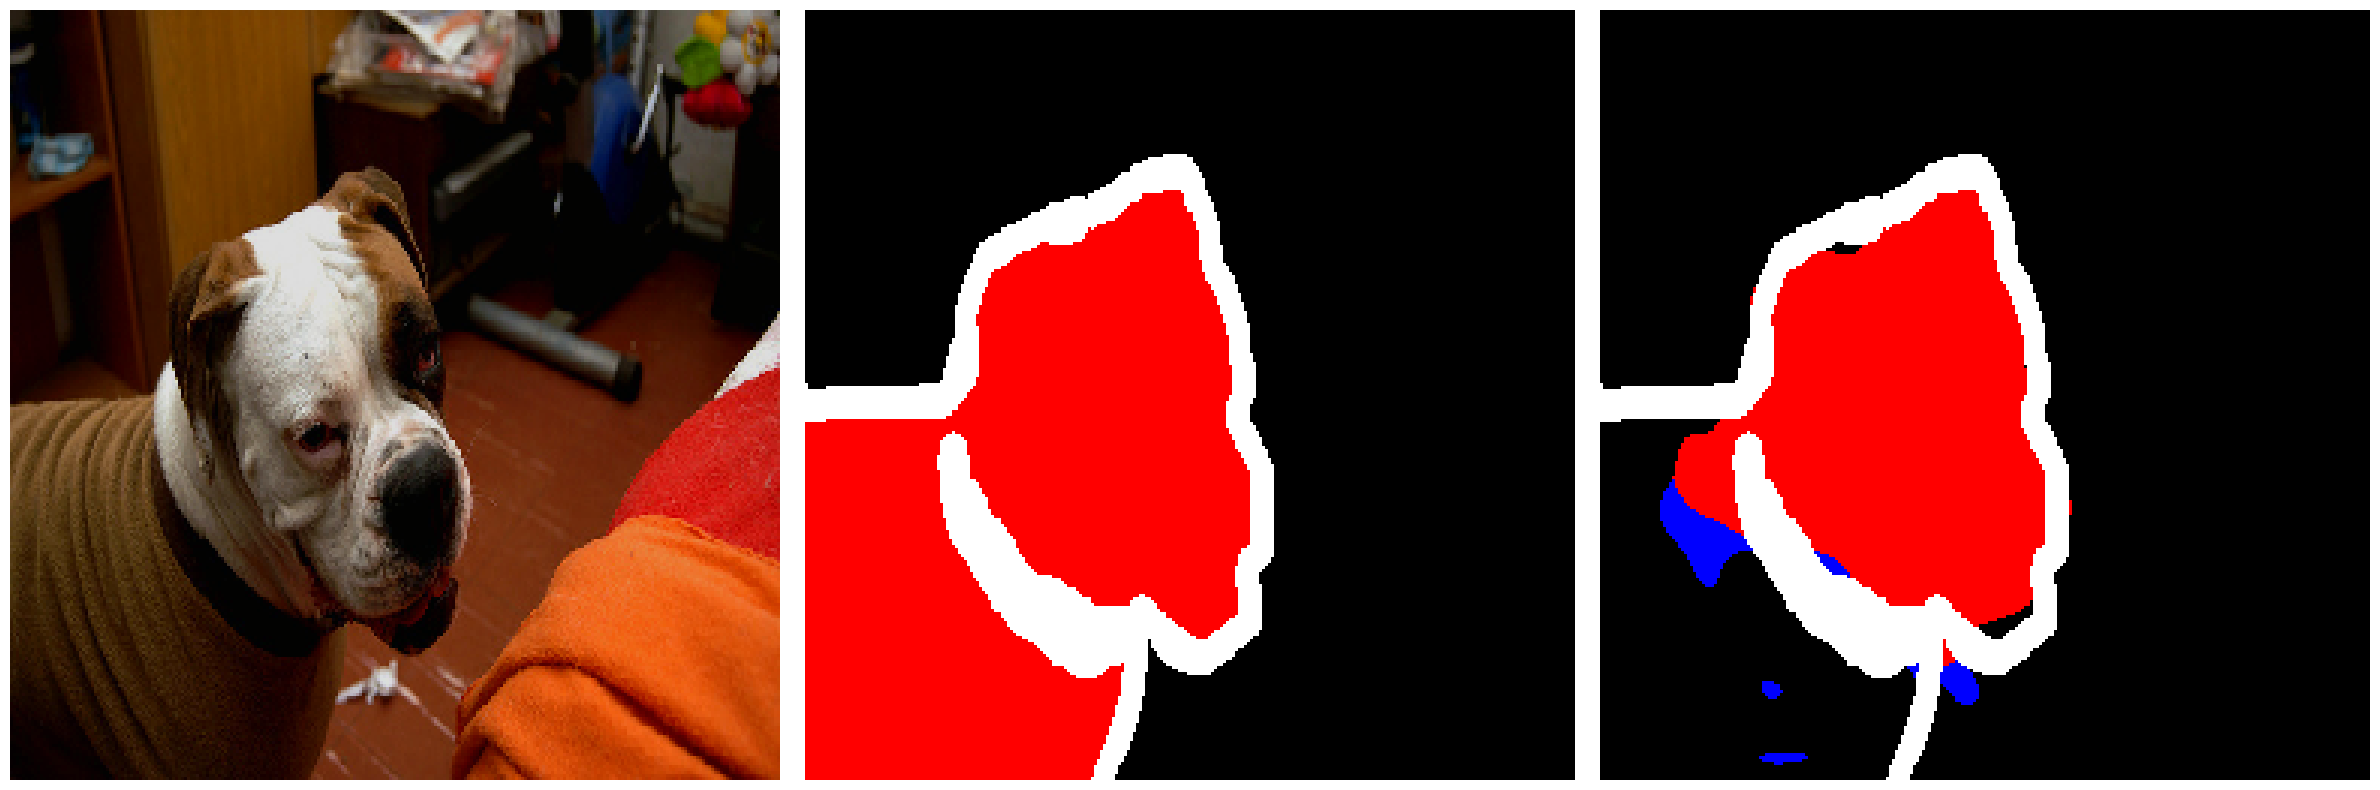

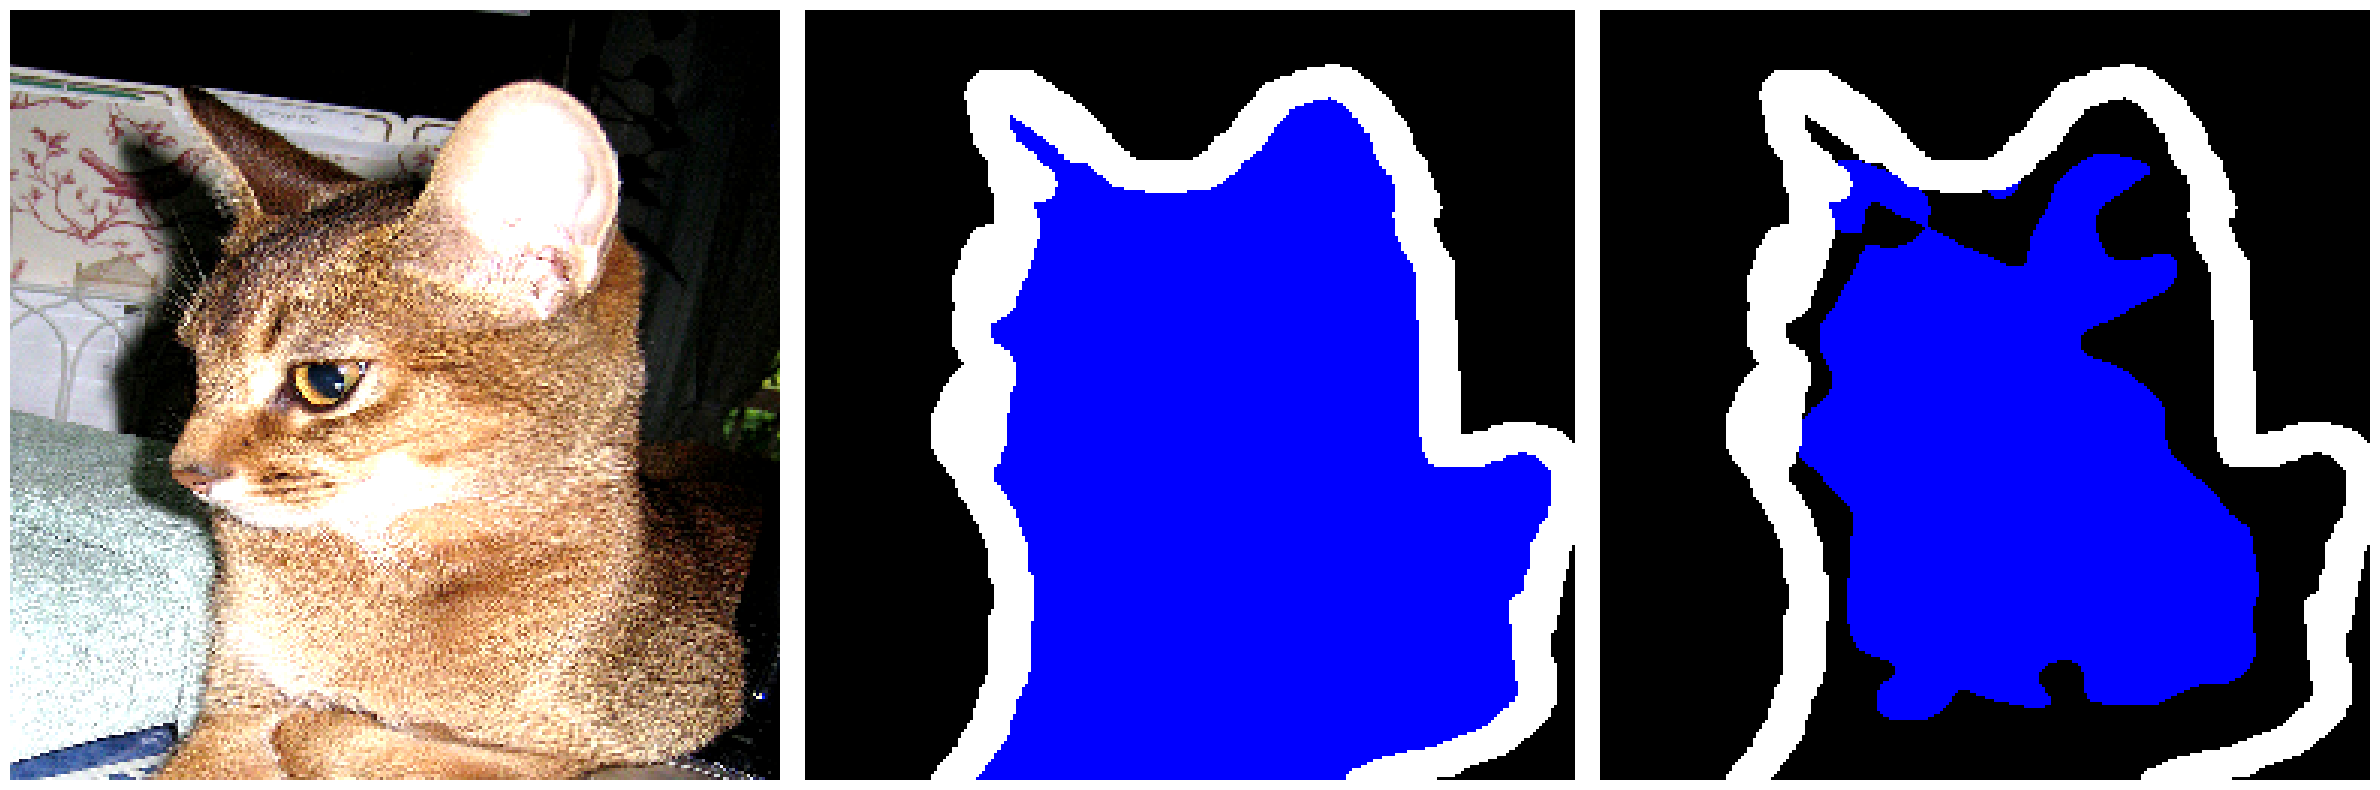

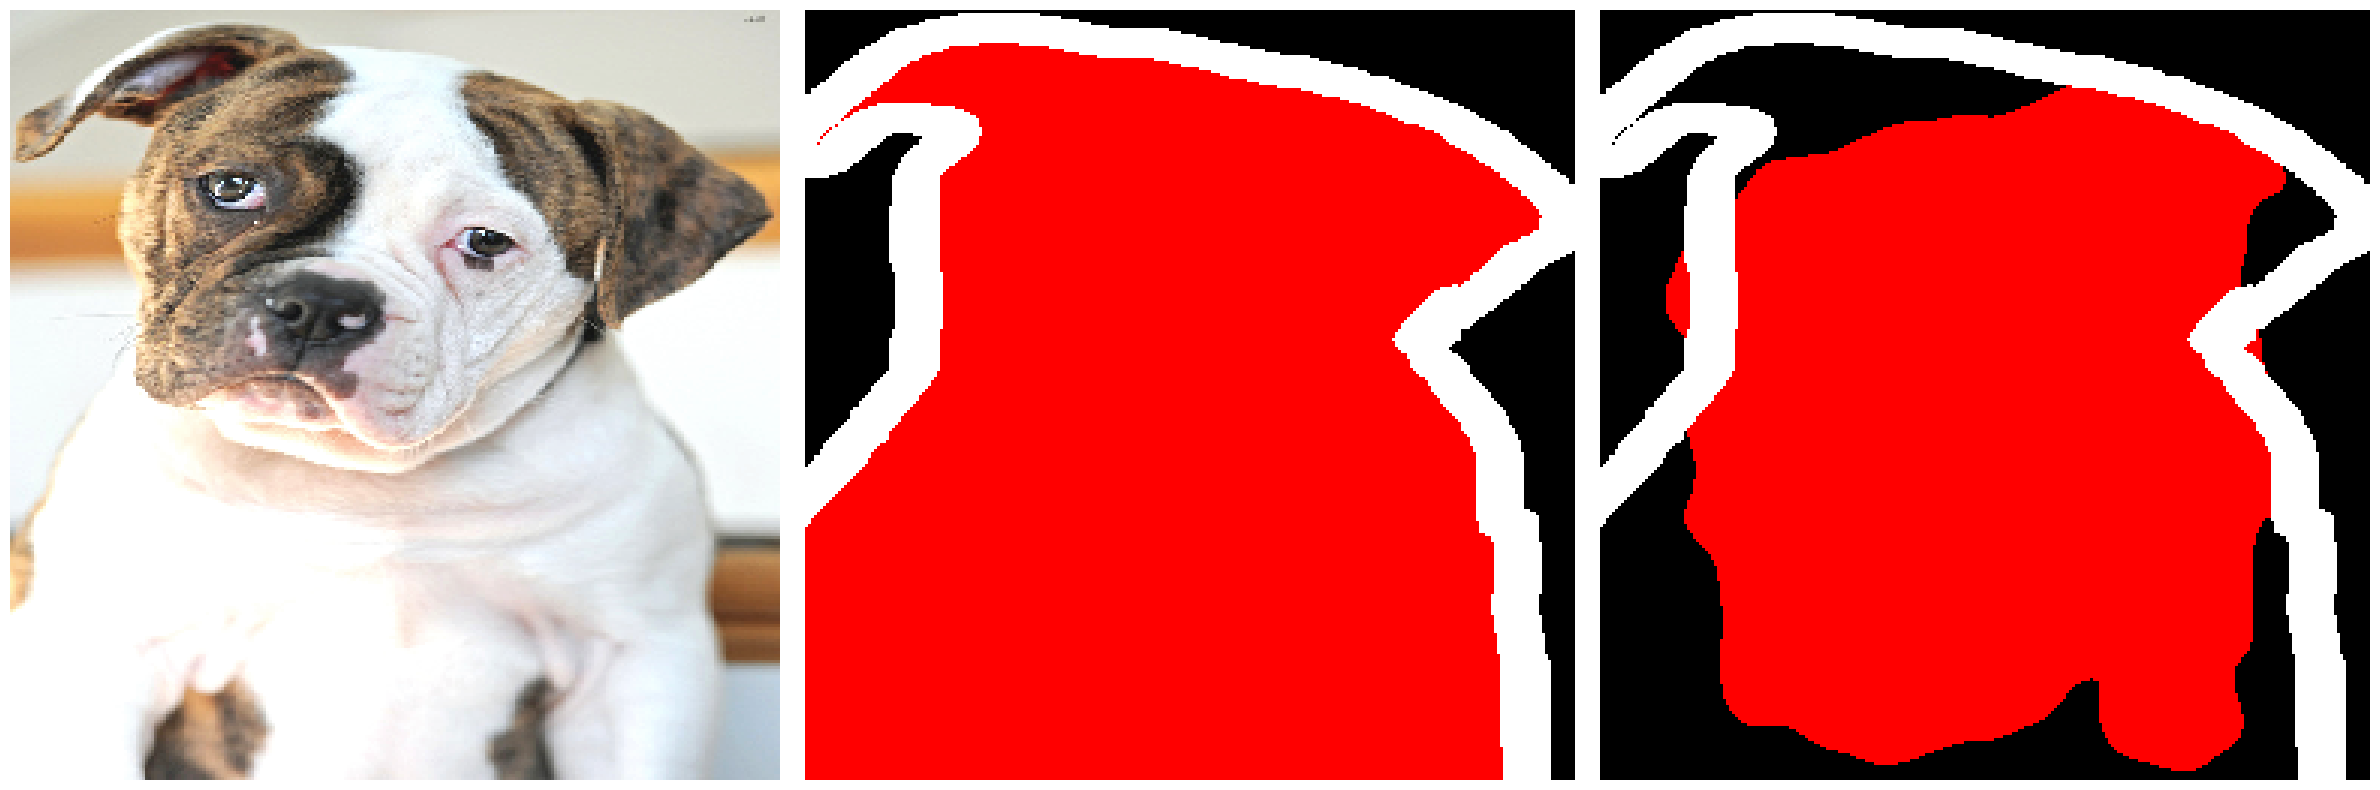

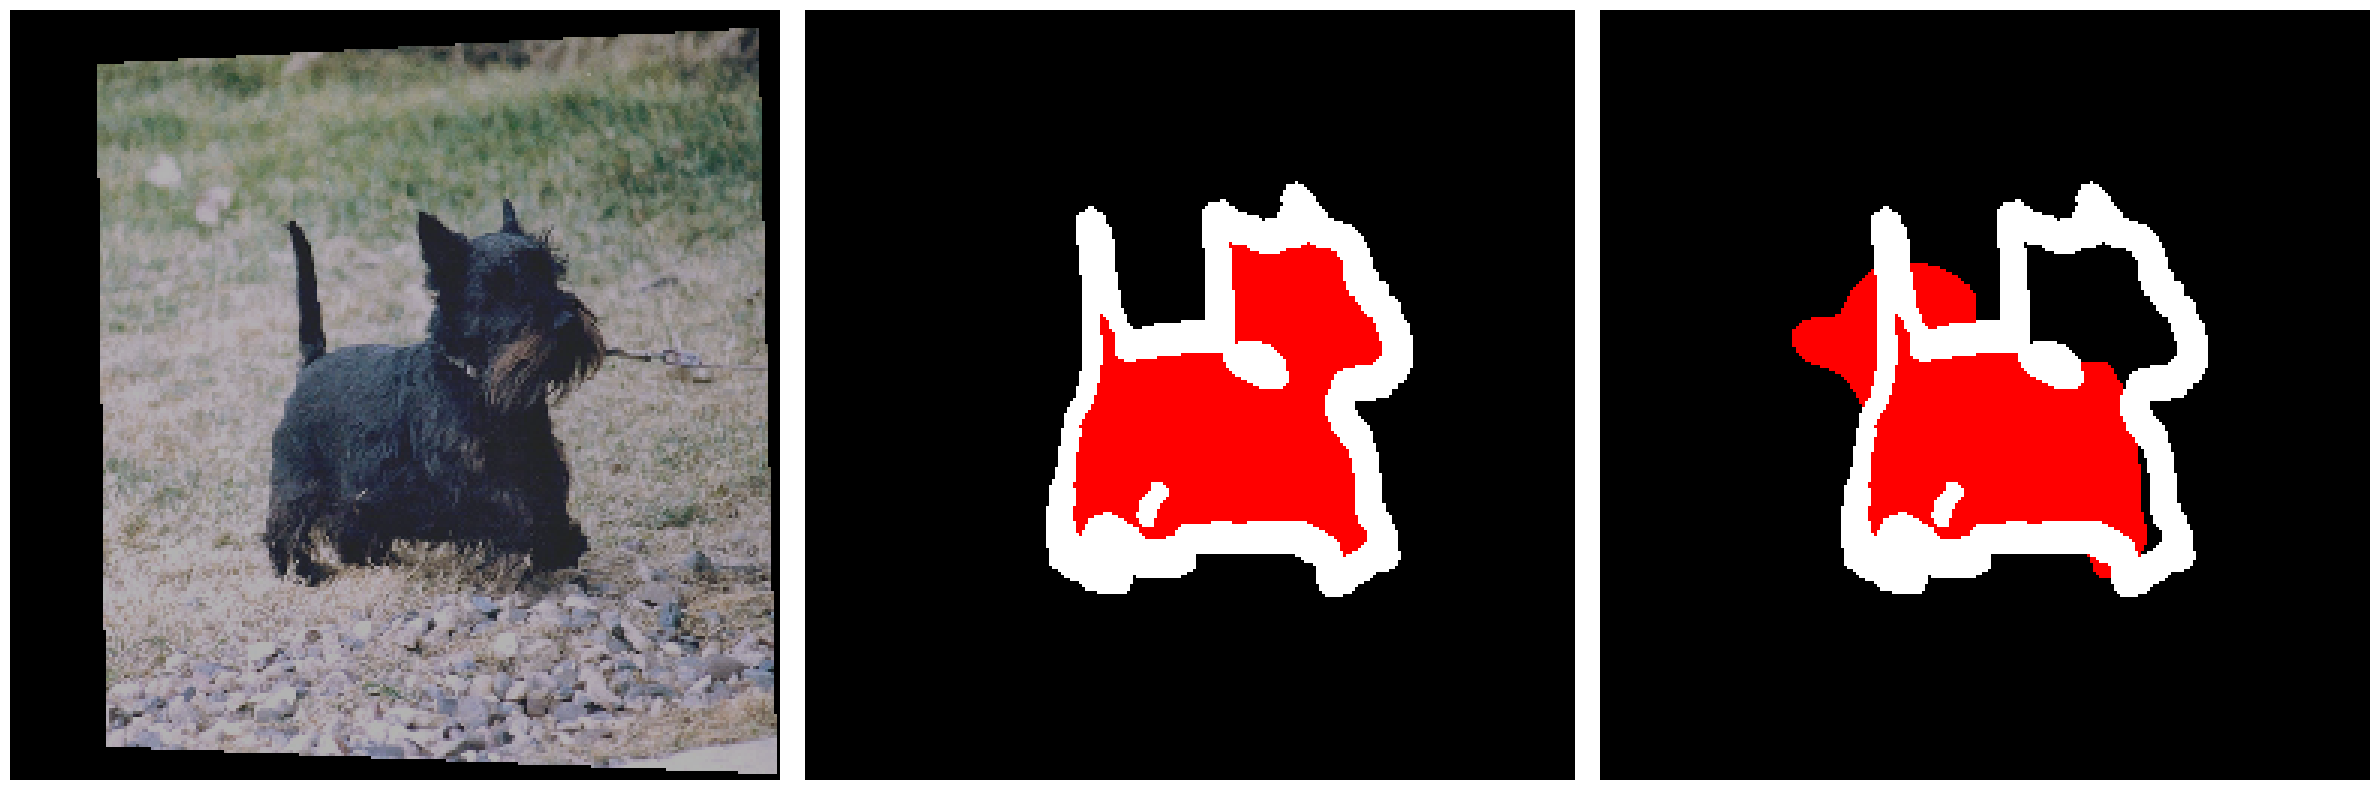

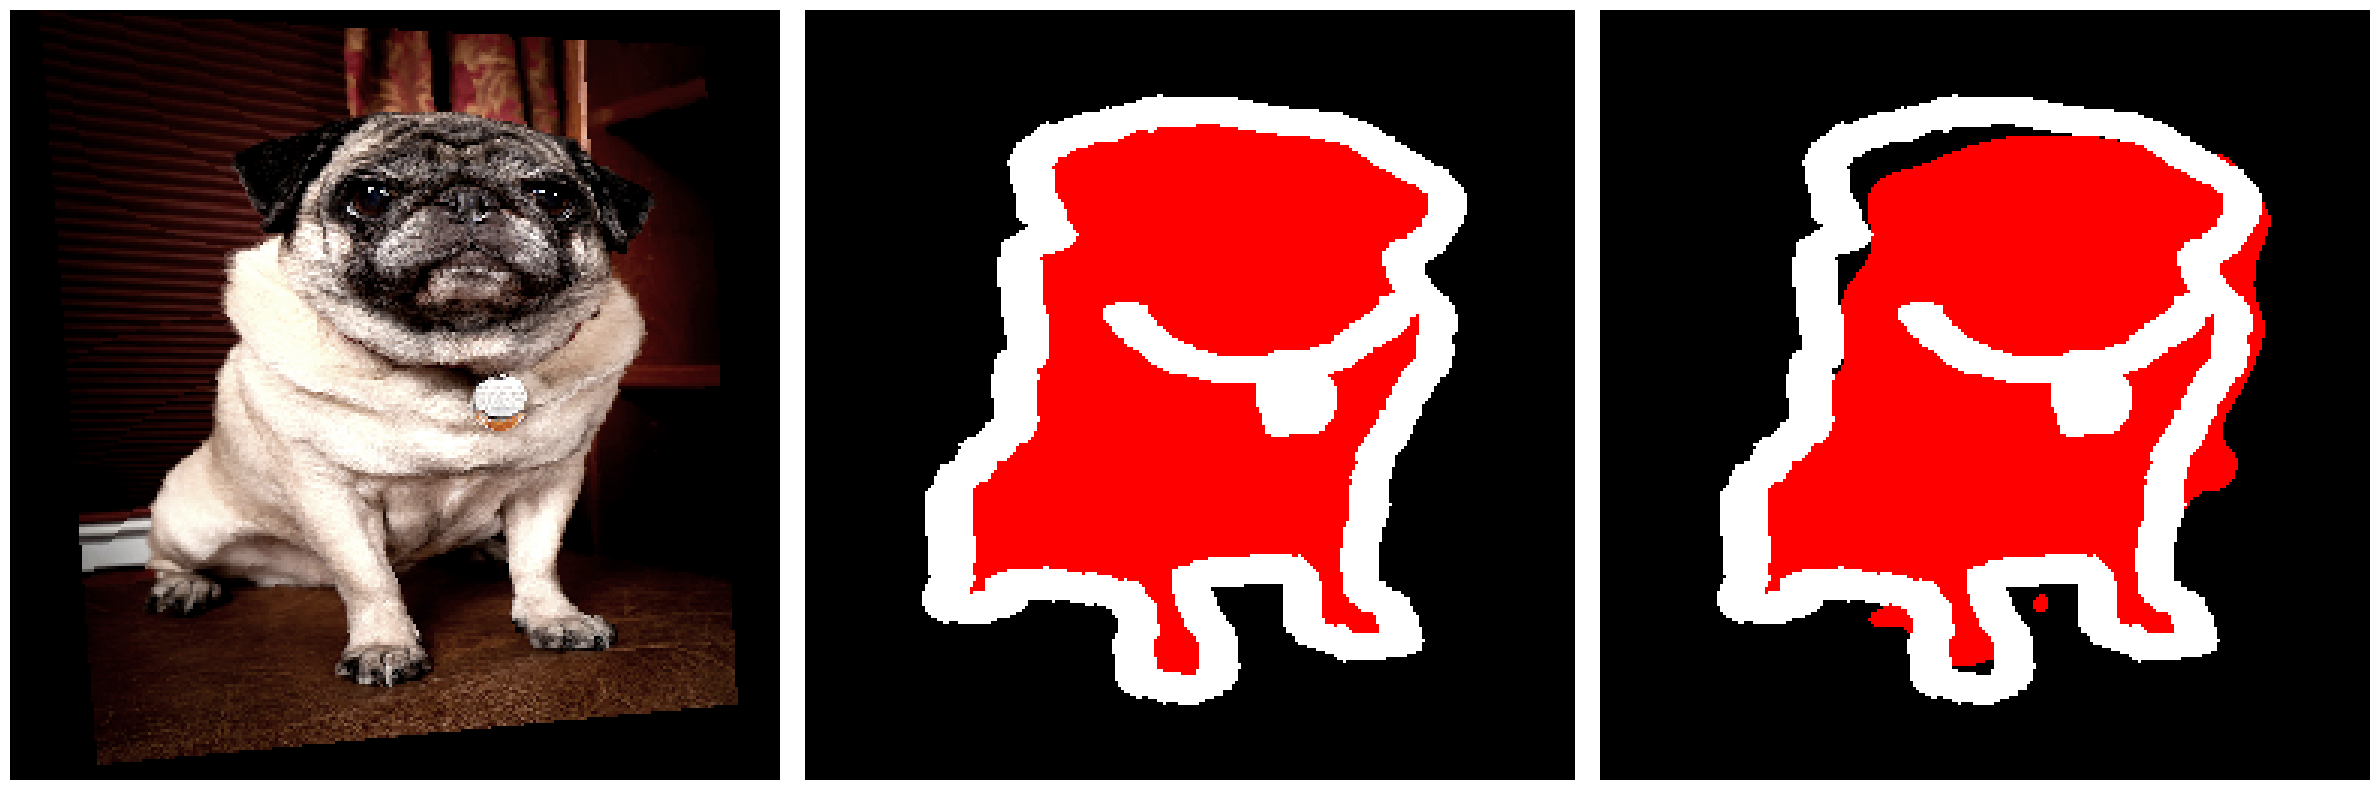

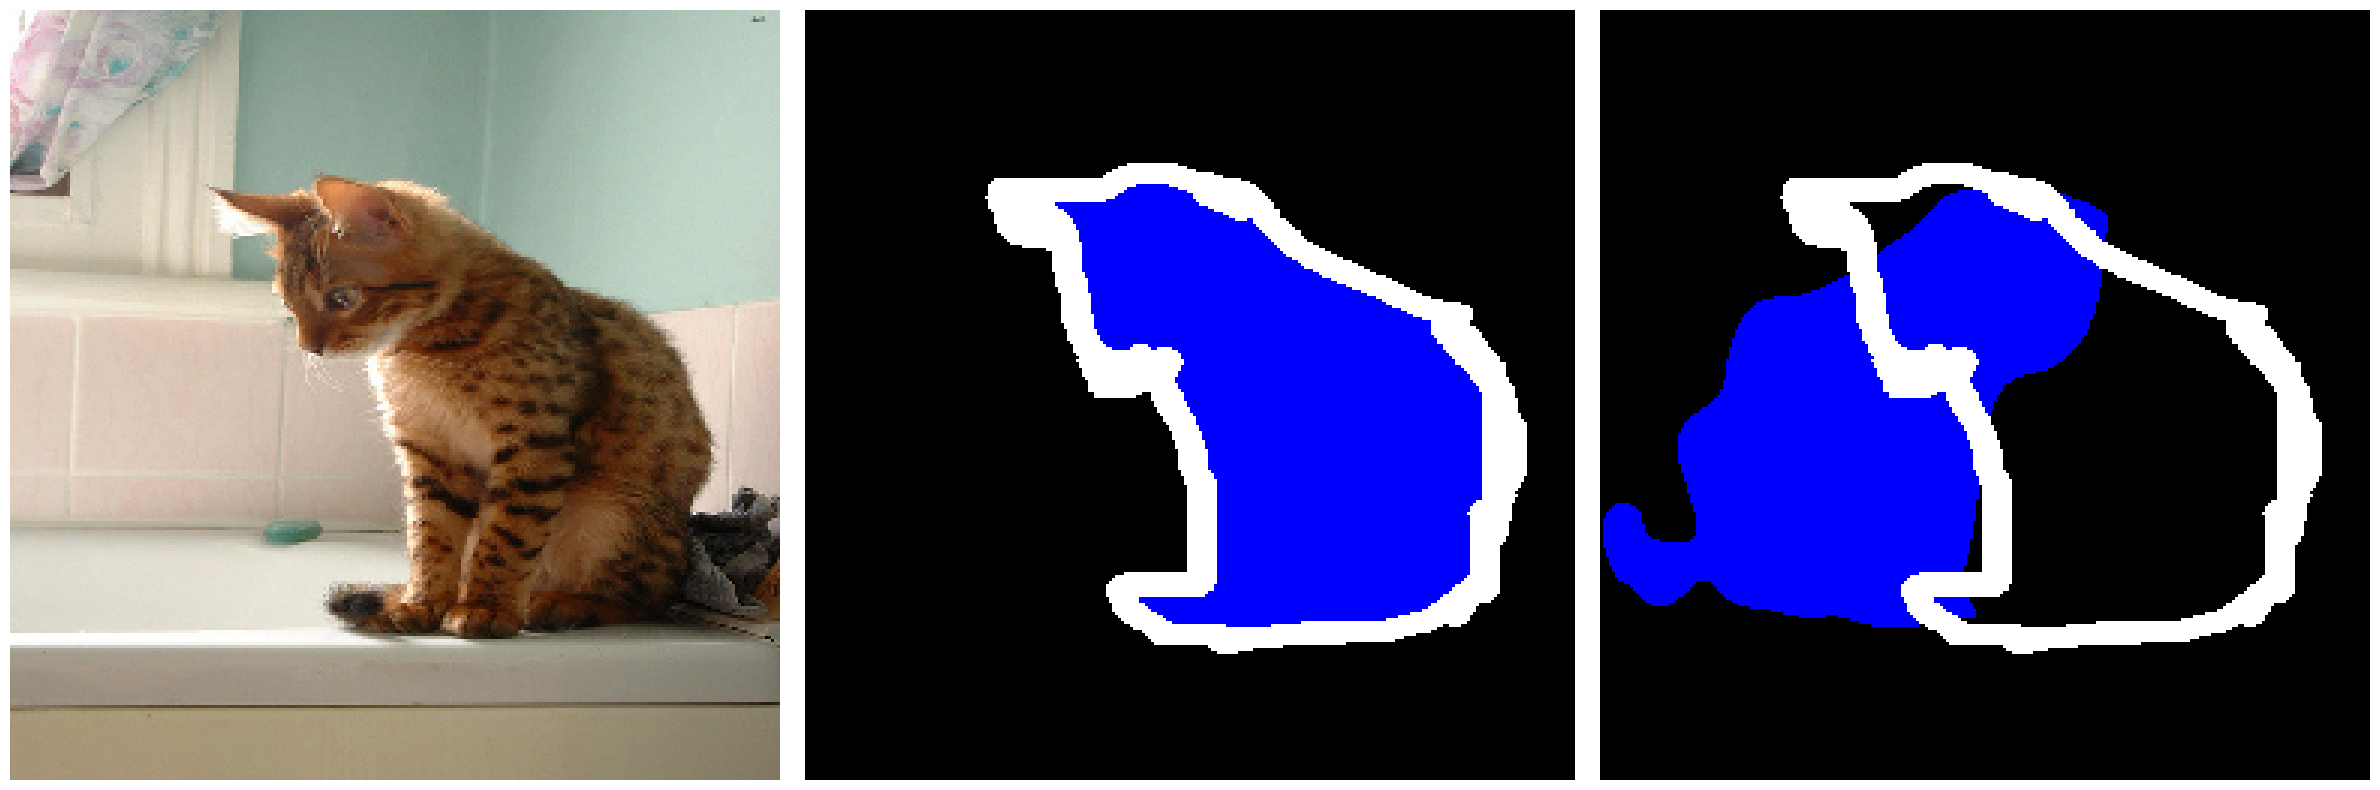

In [95]:
img_idx = np.random.randint(0, 100)
for idx, (input, target) in enumerate(test_dataloader):
    if idx < img_idx:
        continue
    
    # –°–Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ–º, —Å–∫–æ–ª—å–∫–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ —Ç–µ–∫—É—â–µ–º –±–∞—Ç—á–µ
    batch_size = input.size(0)
    
    # –ü—Ä–æ–±–µ–≥–∞–µ–º –ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é –≤ –±–∞—Ç—á–µ
    for b in range(batch_size):
        input_image = input[b].unsqueeze(0) 
        target_image = target[b].unsqueeze(0)
        prediction = dl_prediction[idx * batch_size + b]

        draw((input_image.squeeze(), target_image.squeeze()), t_dict, prediction)
        plt.pause(0.1)
        
        # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        if b >= 1:  # –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–∫–∞–∑—ã–≤–∞–µ–º –ø–µ—Ä–≤—ã–µ 3 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
            break
    
    if idx == img_idx + 2:  # –≠—Ç–æ –º–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å, –µ—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ –æ–≥—Ä–∞–Ω–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π
        break

**FocalLoss**

In [96]:
from torch.optim.lr_scheduler import StepLR

train_config = {
    "num_epochs": 2, # –ø—Ä–∏–º–µ—Ä–Ω–æ–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è ~ 20 –º–∏–Ω—É—Ç –Ω–∞ GPU
    "optimizer": torch.optim.Adam,
    "optimizer_params": {
        "lr": 1e-3,
        "weight_decay": 1e-5
    },
    "loss_fn": metric_class.FocalLoss,
    "scheduler": StepLR,
    "scheduler_params": {
        "step_size": 50,
        "gamma": 0.85
    },
    "validate_each_iter": 10,
    "writer": SummaryWriter(comment="Floss"),
    "save_model_path": "model_floss",
    "metric_class": metric_class
}

net_2 = PSPNet(pretrained_model, SegmentationHead, num_classes=3, train_config=train_config).to(DEVICE)
print("#–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ —Å–µ—Ç–∏:", count_parameters(net_2))

Pretrained main module conv1 is loaded
Pretrained main module bn1 is loaded
Pretrained main module relu is loaded
Pretrained main module maxpool is loaded
Pretrained main module layer1 is loaded
Pretrained main module layer2 is loaded
Pretrained supp module layer3 is loaded
Pretrained supp module layer4 is loaded
#–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤ —Å–µ—Ç–∏: 31107843


In [97]:
net_2.train_model(train_dataloader, val_dataloader)

Epoch: 1/2 || Iter: 0/184 || Loss: 0.9633491635322571
Epoch: 1/2 || Iter: 10/184 || Loss: 0.3329724371433258
Epoch: 1/2 || Iter: 20/184 || Loss: 0.17429614067077637
Epoch: 1/2 || Iter: 30/184 || Loss: 0.12787628173828125
Epoch: 1/2 || Iter: 40/184 || Loss: 0.11508019268512726
Epoch: 1/2 || Iter: 50/184 || Loss: 0.14780637621879578
Epoch: 1/2 || Iter: 60/184 || Loss: 0.10941705852746964
Epoch: 1/2 || Iter: 70/184 || Loss: 0.08626715838909149
Epoch: 1/2 || Iter: 80/184 || Loss: 0.12005826085805893
Epoch: 1/2 || Iter: 90/184 || Loss: 0.09306258708238602
Epoch: 1/2 || Iter: 100/184 || Loss: 0.08096528798341751
Epoch: 1/2 || Iter: 110/184 || Loss: 0.2382243275642395
Epoch: 1/2 || Iter: 120/184 || Loss: 0.10038967430591583
Epoch: 1/2 || Iter: 130/184 || Loss: 0.10072994232177734


KeyboardInterrupt: 

In [99]:
# –ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–π—Ç–µ –≤—Ç–æ—Ä—É—é –º–æ–¥–µ–ª—å –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –º–µ—Ç—Ä–∏–∫–∏:
net_2.load_state_dict(torch.load("model_floss_1.pth"))  # –ù–µ –∑–∞–±—É–¥—å—Ç–µ –ø–æ–º–µ–Ω—è—Ç—å –≤–µ—Ä—Å–∏—é `_1`-> `_n` –µ—Å–ª–∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑!
net_2.eval();
dl_prediction_2, dl_target_2 = net_2.test_model(test_dataloader)
print("Mean IoU metric: ", metric_class.IoUMetric(dl_prediction_2, dl_target_2))
print("Mean Recall metric: ", metric_class.RecallMetric(dl_prediction_2, dl_target_2))

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.79 GiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 8.32 GiB is allocated by PyTorch, and 3.61 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
img_idx = np.random.randint(0, 100)
for idx, (input, target) in enumerate(test_dataloader):
    if idx < img_idx:
        continue
    
    # –°–Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ–º, —Å–∫–æ–ª—å–∫–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ —Ç–µ–∫—É—â–µ–º –±–∞—Ç—á–µ
    batch_size = input.size(0)
    
    # –ü—Ä–æ–±–µ–≥–∞–µ–º –ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é –≤ –±–∞—Ç—á–µ
    for b in range(batch_size):
        input_image = input[b].unsqueeze(0) 
        target_image = target[b].unsqueeze(0)
        prediction = dl_prediction_2[idx * batch_size + b]

        draw((input_image.squeeze(), target_image.squeeze()), t_dict, prediction)
        plt.pause(0.1)
        
        # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
        if b >= 1:  # –ù–∞–ø—Ä–∏–º–µ—Ä, –ø–æ–∫–∞–∑—ã–≤–∞–µ–º –ø–µ—Ä–≤—ã–µ 3 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
            break
    
    if idx == img_idx + 2:  # –≠—Ç–æ –º–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å, –µ—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ –æ–≥—Ä–∞–Ω–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∞—Ç—á–µ–π
        break